In [22]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [2]:
# Distribución de frecuencias, indica el numero de registros (filas) en nuestro
# dataframe

datos = datos.rename(columns=({"DMDEDUC2":"NIVEL_EDUCATIVO","BMXWT":"PESO_CORPORAL",
                              "BPXSY1":"P_ARTERIAL_SIST_1","BPXSY2":"P_ARTERIAL_SIST_2",
                               "BPXDI1":"P_ARTERIAL_DIAS_1","BPXSY2":"P_ARTERIAL_DIAS_2",
                               "RIDAGEYR":"EDAD"
                              
                              }))
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,P_ARTERIAL_DIAS_2,BPXDI2,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
datos["EDUCACION"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 
datos.value_counts().sort_values(ascending=False)

SEQN   ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  EDAD  RIDRETH1  DMDCITZN  NIVEL_EDUCATIVO  DMDMARTL  DMDHHSIZ  WTINT2YR   SDMVPSU  SDMVSTRA  INDFMPIR  P_ARTERIAL_SIST_1  P_ARTERIAL_DIAS_1  P_ARTERIAL_DIAS_2  BPXDI2  PESO_CORPORAL  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  EDUCACION  
83735  2.0     1.0     1.0     2       2         56    3         1.0       5.0              6.0       1         102718.00  1        131       5.00      132.0              72.0               134.0              68.0    109.8          160.9  42.4    38.5    37.7     38.3     110.1     2.0     No Indica      1
86013  2.0     1.0     1.0     1       2         64    2         2.0       5.0              3.0       3         7791.99    1        124       3.48      122.0              74.0               126.0              78.0    76.4           168.6  26.9    38.1    37.2     32.2     96.2      2.0     No Indica      1
84295  2.0     1.0     1.0     1       2         58    5         1.0       5.0   

In [4]:
a = datos
datos["NIVEL_EDUCATIVO"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 

pd.isnull(a.NIVEL_EDUCATIVO).sum() # datos vacios tipo NaN

261

In [5]:
contador = 0
for i in range(len(a.NIVEL_EDUCATIVO)):
    
    if pd.isnull(a.NIVEL_EDUCATIVO[i]) ==  True:
        print(a.NIVEL_EDUCATIVO.index[i])
        contador += 1
        
print("datos vacios tipos nan son ",contador)        
        
    

8
16
54
59
67
86
104
171
172
230
274
278
316
371
375
383
393
404
413
420
425
455
464
487
541
555
568
575
625
630
632
683
726
741
752
835
864
886
902
912
965
968
970
1024
1041
1065
1077
1091
1096
1103
1117
1193
1195
1213
1230
1243
1271
1325
1387
1388
1427
1447
1509
1511
1522
1535
1578
1620
1634
1655
1658
1660
1718
1739
1794
1800
1801
1802
1809
1819
1830
1923
1960
1962
1979
2009
2019
2021
2040
2071
2081
2187
2193
2210
2221
2239
2260
2279
2304
2317
2338
2339
2345
2379
2404
2408
2502
2518
2521
2524
2574
2578
2618
2626
2635
2713
2748
2770
2805
2826
2855
2874
2880
2915
2927
2937
2944
2950
2976
2978
2983
2987
3000
3019
3046
3089
3102
3150
3184
3188
3193
3221
3227
3234
3242
3262
3374
3417
3446
3472
3487
3489
3516
3597
3607
3620
3625
3637
3699
3783
3786
3787
3789
3809
3817
3827
3831
3848
3877
3888
3912
3945
3950
3971
3983
3996
4011
4014
4075
4077
4080
4122
4146
4150
4196
4197
4198
4204
4215
4247
4331
4341
4348
4349
4351
4371
4407
4417
4435
4491
4524
4529
4550
4552
4590
4596
4621
4623
4628
4643


In [6]:
a.NIVEL_EDUCATIVO.value_counts()

Universidad                1621
No Indica                  1366
Bachiller                  1186
Noveno Grado                655
Noveno a Undecimo Grado     643
Desconocido                   3
Name: NIVEL_EDUCATIVO, dtype: int64

In [7]:
pd.isnull(a.NIVEL_EDUCATIVO)

0       False
1       False
2       False
3       False
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Name: NIVEL_EDUCATIVO, Length: 5735, dtype: bool

In [8]:
# creando columnas nuevas

datos["SEXO"] = datos.RIAGENDR.replace({1:"Mujer",2:"Hombre"})

datos

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,EDUCACION,SEXO
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,No Indica,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,No Indica,Mujer
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,Bachiller,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Bachiller,Mujer
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,Bachiller,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Bachiller,Mujer
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,No Indica,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No Indica,Hombre
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,Universidad,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Universidad,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,Bachiller,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Bachiller,Hombre
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,No Indica,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,No Indica,Mujer
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,Universidad,...,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Universidad,Hombre
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,Noveno Grado,...,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Noveno Grado,Mujer


In [17]:
# porcentajes - tabla de frecuencias

datos.NIVEL_EDUCATIVO.value_counts(normalize=True)*100

Universidad                29.612715
No Indica                  24.954330
Bachiller                  21.666058
Noveno Grado               11.965656
Noveno a Undecimo Grado    11.746438
Desconocido                 0.054805
Name: NIVEL_EDUCATIVO, dtype: float64

In [18]:
datos.SEXO.value_counts(normalize=True)*100

Hombre    51.891892
Mujer     48.108108
Name: SEXO, dtype: float64

In [19]:
datos.SEXO.count()

5735

In [20]:
datos.NIVEL_EDUCATIVO.dropna().count()
datos.NIVEL_EDUCATIVO.dropna().describe()

count            5474
unique              6
top       Universidad
freq             1621
Name: NIVEL_EDUCATIVO, dtype: object

In [21]:
datos.PESO_CORPORAL.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: PESO_CORPORAL, dtype: float64

A continuación, calculamos la proporción de sujetos de NHANES que son prehipertensos en función de la presión arterial diastólica.

In [23]:
import numpy as np

a =((datos.BPXDI1 >=80) & (datos.BPXDI2 <=89))
a.mean()

0.14803836094158676

In [24]:
b = ((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))
b.mean()

0.14803836094158676

In [25]:
np.mean((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))

0.14803836094158676

In [26]:
prueba_promedio = [datos["BPXDI1"],datos["BPXDI2"]]
np.mean((prueba_promedio[0] >= 80)&(prueba_promedio[1]<=89))

0.14803836094158676

In [29]:
# creando columnas nuevas

datos["SEXO"] = datos.RIAGENDR.replace({1:"Mujer",2:"Hombre"})

datos

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SEXO
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Mujer
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Mujer
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Mujer
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Hombre
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Hombre
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Mujer
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Hombre
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Mujer


In [34]:
datos.columns
np.mean((datos.SEXO=="Mujer") &(datos.BPXDI1))

0.45440278988666083

In [35]:
datos.SEXO

0        Mujer
1        Mujer
2        Mujer
3       Hombre
4       Hombre
         ...  
5730    Hombre
5731     Mujer
5732    Hombre
5733     Mujer
5734    Hombre
Name: SEXO, Length: 5735, dtype: object

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


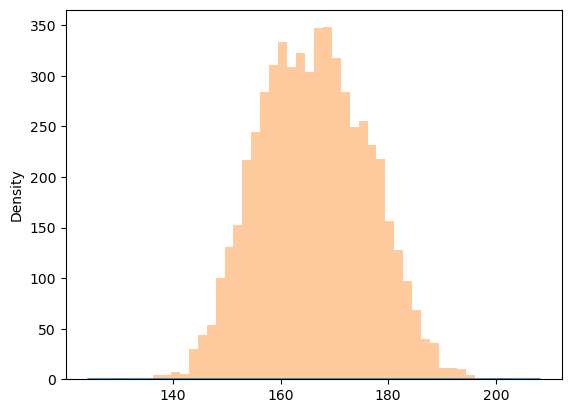

In [36]:
a = sns.distplot(x=datos.BMXHT.dropna()) # Estamos gráficando datos sin los datos NAN
b = sns.distplot(x=datos.BMXHT, kde= False)



Text(0.5, 1.0, 'Hola')

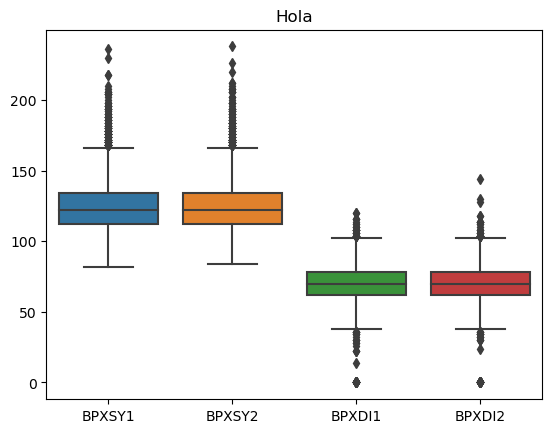

In [37]:
sub_datos = datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]]

a = sns.boxplot(data=sub_datos)
a.set_title("Hola")

# Esta es una forma de gráficar nuestros datos

<AxesSubplot:>

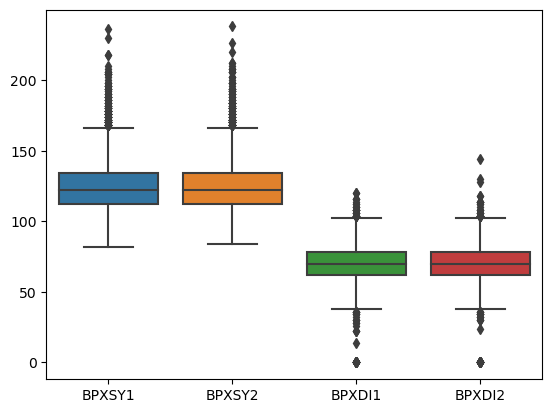

In [38]:
# también podemos hacerlo directamente sobre sns

sns.boxplot(data=datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]])

In [39]:
# podemos hacer cortes por edad y por género

datos["Años_Corte"] = pd.cut(datos.RIAGENDR,[18,30,40,50,60,70,80])

#sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="Años_Corte", hue="SEXO")


# se hace un corte de años
# luego se comparan tipo de años los cortes
# finalmente se usa el parametro hue para diferenciar entre dos categorías

In [41]:
# renombrando 

datos = datos.rename(columns=({"DMDEDUC2":"NIVEL_EDUCATIVO","BMXWT":"PESO_CORPORAL",
                              "BPXSY1":"P_ARTERIAL_SIST_1","BPXSY2":"P_ARTERIAL_SIST_2",
                               "BPXDI1":"P_ARTERIAL_DIAS_1","BPXSY2":"P_ARTERIAL_DIAS_2",
                               "RIDAGEYR":"EDAD"
                              
                              }))

<AxesSubplot:xlabel='SEXO', ylabel='P_ARTERIAL_SIST_1'>

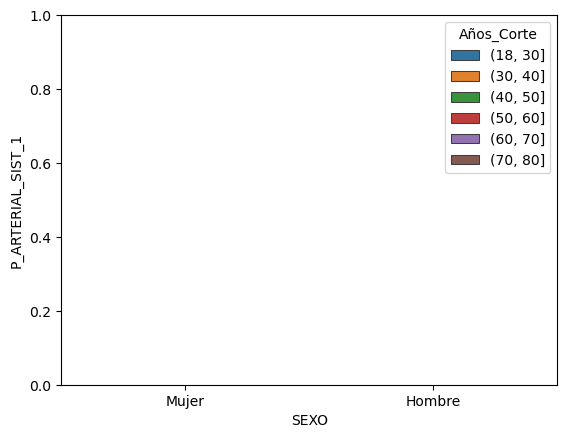

In [44]:
# esto mismo se puede hacer haciendo la división por los años

sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="SEXO", hue="Años_Corte")


In [53]:
# recordemos que groupby nos envia una seríe 
datos.SEXO.value_counts()
datos.groupby("EDAD").SEXO.value_counts()



EDAD  SEXO  
18    Hombre     70
      Mujer      63
19    Mujer      72
      Hombre     56
20    Mujer      40
               ... 
78    Hombre     21
79    Hombre     21
      Mujer      14
80    Hombre    180
      Mujer     163
Name: SEXO, Length: 126, dtype: int64

In [54]:
datos.groupby(["Años_Corte"]).SEXO.size()

Años_Corte
(18, 30]    0
(30, 40]    0
(40, 50]    0
(50, 60]    0
(60, 70]    0
(70, 80]    0
Name: SEXO, dtype: int64

In [64]:
datos["EDUCACION"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 



ejemplo = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
#ejemplo = ejemplo.loc[~ejemplo.isin(["Desconocido"]),:]

ejemplo.unstack()

,EDUCACION
Años_Corte,SEXO


In [ ]:
a = datos.index
type(a)

In [ ]:
datos_2 = datos
datos_2.head()

In [ ]:
ejemplo_2 = datos.loc[datos_2.EDUCACION.isin(["Desconocido","No Indica"]),:]
#ejemplo_2 = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
ejemplo_2.EDUCACION

In [ ]:
dx = datos.loc[~datos.DMDEDUC2.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["Años_Corte", "RIAGENDR"])["DMDEDUC2"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

In [ ]:
datos.head()

In [65]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Pregunta 1
Vuelva a etiquetar la variable de estado civil DMDMARTL para tener etiquetas de caracteres breves pero informativas. Luego construya una tabla de frecuencia de estos valores para todas las personas, luego solo para mujeres y solo para hombres. Luego construya estas tres tablas de frecuencia usando solo personas cuya edad esté entre 30 y 40 años.

In [66]:
datos.DMDMARTL.value_counts().sort_values(ascending=False)

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [67]:
datos["ESTADO_CIVIL"] = datos.DMDMARTL.replace({
    1:"CASADO",
    2:"VIUDO",
    3:"DIVORCIADO",
    4:"APARTADO",
    5:"NUNCA CASADO",
    6:"UNION_LIBRE",
    77:"RECHAZA",
    99:"NO_SABE"
})

datos["ESTADO_CIVIL"].value_counts()

CASADO          2780
NUNCA CASADO    1004
DIVORCIADO       579
UNION_LIBRE      527
VIUDO            396
APARTADO         186
RECHAZA            2
Name: ESTADO_CIVIL, dtype: int64

In [68]:
a = datos.loc[datos.RIAGENDR.isin([1]),:]
a.ESTADO_CIVIL.value_counts() # imprime solo los datos de las mujeres

CASADO          1477
NUNCA CASADO     484
UNION_LIBRE      265
DIVORCIADO       229
VIUDO            100
APARTADO          68
RECHAZA            1
Name: ESTADO_CIVIL, dtype: int64

In [69]:
a.groupby(["ESTADO_CIVIL"]).RIAGENDR.value_counts().sort_values()

ESTADO_CIVIL  RIAGENDR
RECHAZA       1              1
APARTADO      1             68
VIUDO         1            100
DIVORCIADO    1            229
UNION_LIBRE   1            265
NUNCA CASADO  1            484
CASADO        1           1477
Name: RIAGENDR, dtype: int64

In [70]:
b = datos.loc[datos.RIAGENDR.isin([2]),:]
b.ESTADO_CIVIL.value_counts().sort_values() # imprime los hombres

RECHAZA            1
APARTADO         118
UNION_LIBRE      262
VIUDO            296
DIVORCIADO       350
NUNCA CASADO     520
CASADO          1303
Name: ESTADO_CIVIL, dtype: int64

In [71]:
datos["SEXO"] = datos.RIAGENDR.replace({1:"HOMBRE",2:"MUJER"})
c = datos.loc[(datos.RIDAGEYR >= 20) & (datos.RIDAGEYR <=40)]


c.groupby(["ESTADO_CIVIL"]).SEXO.value_counts().sort_values(ascending=False)

ESTADO_CIVIL  SEXO  
CASADO        MUJER     416
              HOMBRE    362
NUNCA CASADO  MUJER     356
              HOMBRE    351
UNION_LIBRE   MUJER     171
              HOMBRE    167
DIVORCIADO    MUJER      54
APARTADO      MUJER      28
DIVORCIADO    HOMBRE     26
APARTADO      HOMBRE     19
VIUDO         HOMBRE      4
              MUJER       2
RECHAZA       HOMBRE      1
Name: SEXO, dtype: int64

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESTADO_CIVIL'>

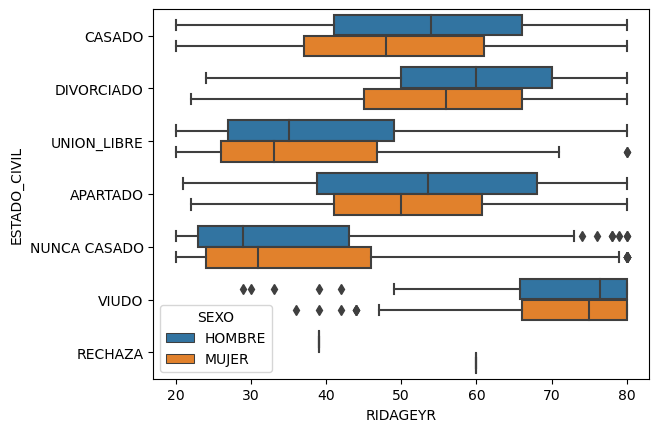

In [72]:

sns.boxplot(data=datos, x="RIDAGEYR", y="ESTADO_CIVIL", hue="SEXO")

Entre generos y estado civil podemos observar que las personas entre un rango de edad entre los 20 y los 40 años, predominan personas que nunca se han casado o que se encuentran en unińo libre, posteriormente vemos que las mujeres tienen a comprometerse antes que los hombres (apartado) pero estando en un rango de edad mucho más elevado, vemos que los hombres tienden a separarse en promedio mucho antes que las mujeres. y que equiparablemente, hay una proporción similar de como enviudan ambos sexos

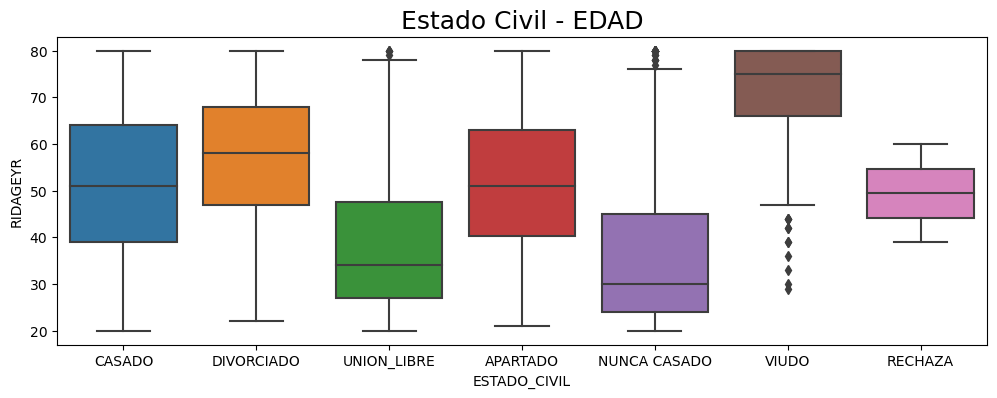

In [73]:

dx = sns.boxplot(data=datos, y="RIDAGEYR", x="ESTADO_CIVIL")
dx.set_title("Estado Civil - EDAD", fontsize = 18)
dx.figure.set_size_inches(12,4)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESTADO_CIVIL'>

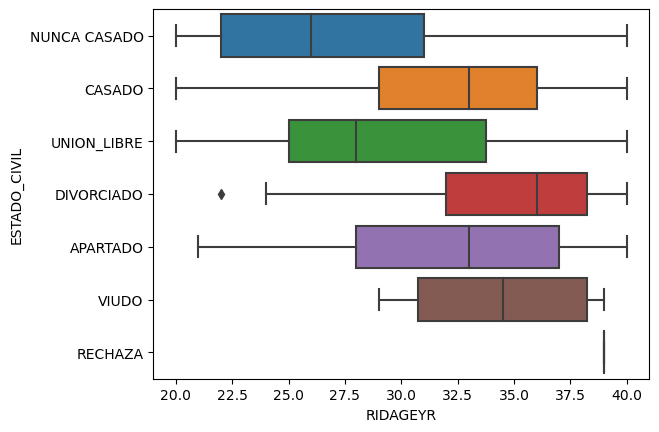

In [74]:
sns.boxplot(data=c, y="ESTADO_CIVIL",x="RIDAGEYR")

## Pregunta 2
Restringiendo a la población femenina, estratifique a los sujetos en franjas de edad no mayores a diez años, y construya la distribución del estado civil dentro de cada franja de edad. Dentro de cada franja de edad, presente la distribución en términos de proporciones que deben sumar 1.

In [75]:
datos["CORTE_EDAD"] = pd.cut(datos.RIDAGEYR,[18,30,40,50,60,70,80])
d = datos.loc[(datos.SEXO == "MUJER"),:]
d = d.groupby(["ESTADO_CIVIL"]).CORTE_EDAD.value_counts(normalize = True).sort_values(ascending=False)
d.unstack()

# MUJERES

,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ESTADO_CIVIL,,,,,,
APARTADO,0.093220,0.144068,0.279661,0.228814,0.186441,0.067797
CASADO,0.121259,0.198005,0.221028,0.197237,0.162701,0.099770
DIVORCIADO,0.031429,0.122857,0.197143,0.237143,0.242857,0.168571
NUNCA CASADO,0.498077,0.186538,0.121154,0.080769,0.073077,0.040385
RECHAZA,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
UNION_LIBRE,0.435115,0.217557,0.141221,0.122137,0.072519,0.011450
VIUDO,0.000000,0.006757,0.040541,0.094595,0.219595,0.638514


In [76]:
datos["CORTE_EDAD"] = pd.cut(datos.RIDAGEYR,[18,30,40,50,60,70,80])
d = datos.loc[(datos.SEXO == "HOMBRE"),:]
d = d.groupby(["ESTADO_CIVIL"]).CORTE_EDAD.value_counts(normalize = True).sort_values(ascending=False)
d.unstack()

# HOMBRES

,"(18, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
ESTADO_CIVIL,,,,,,
APARTADO,0.102941,0.176471,0.161765,0.147059,0.205882,0.205882
CASADO,0.070413,0.174678,0.190928,0.200406,0.197021,0.166554
DIVORCIADO,0.008734,0.104803,0.148472,0.248908,0.240175,0.248908
NUNCA CASADO,0.541322,0.183884,0.080579,0.097107,0.078512,0.018595
RECHAZA,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
UNION_LIBRE,0.358491,0.271698,0.124528,0.128302,0.083019,0.033962
VIUDO,0.020000,0.020000,0.020000,0.100000,0.170000,0.670000


Construya un histograma de la distribución de alturas utilizando la variable BMXHT en la muestra NHANES.

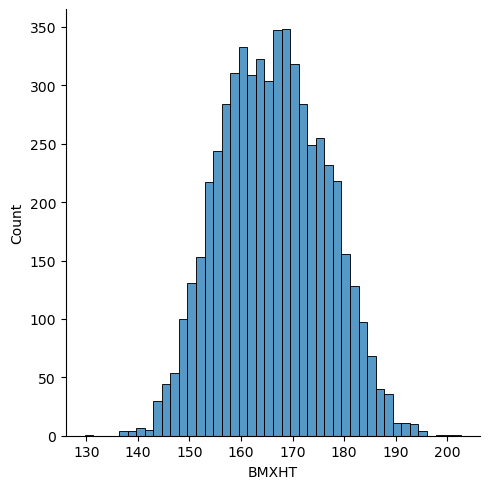

In [77]:
sns.displot(x=datos.BMXHT, kde=False)

Use el argumento bins para distplot para producir histogramas con diferentes números de bins. Evalúe si el valor predeterminado para este argumento da un resultado significativo y comente lo que sucede a medida que la cantidad de contenedores crece excesivamente o es demasiado pequeña.

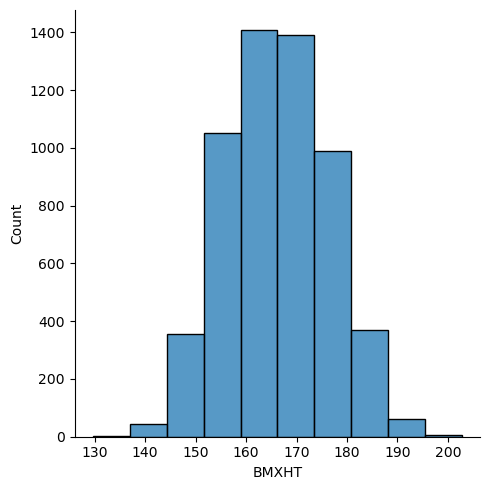

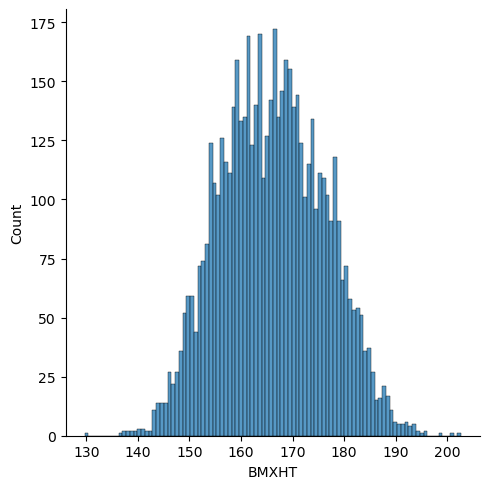

In [78]:
sns.displot(x=datos.BMXHT, bins=10,kde=False)
sns.displot(x=datos.BMXHT, bins=100,kde=False)

Haz histogramas separados para las estaturas de mujeres y hombres, luego haz un diagrama de caja de lado a lado que muestre las estaturas de mujeres y hombres.

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Altura')

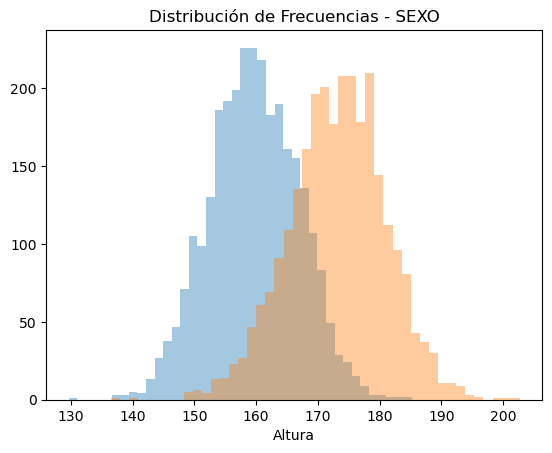

In [79]:
a = datos.loc[(datos.SEXO=="MUJER"),:]
ax= sns.distplot(x=a.BMXHT, kde=False)
a = datos.loc[(datos.SEXO=="HOMBRE"),:]
ax = sns.distplot(x=a.BMXHT, kde=False)
ax.set_title("Distribución de Frecuencias - SEXO")
ax.set_xlabel("Altura")


Text(0.5, 0, 'Altura')

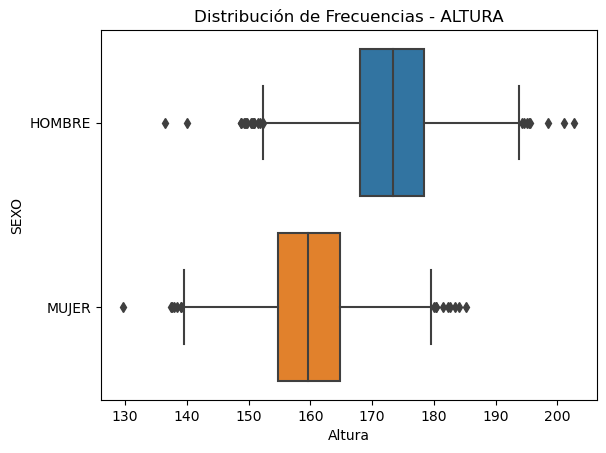

In [80]:
ax = sns.boxplot(x=datos.BMXHT, y=datos.SEXO)
ax.set_title("Distribución de Frecuencias - ALTURA")
ax.set_xlabel("Altura")


Haga un diagrama de caja que muestre la distribución de las diferencias dentro del sujeto entre la primera y la segunda medición de la presión arterial sistólica (BPXSY1 y BPXSY2).


<AxesSubplot:xlabel='DIFERENCIA'>

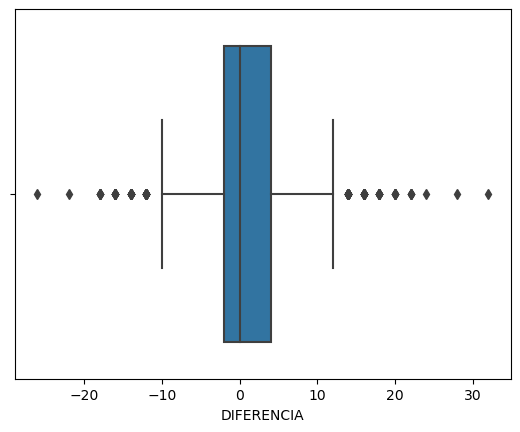

In [81]:
datos["DIFERENCIA"] = datos.BPXSY1 - datos.BPXSY2
sns.boxplot(x=datos.DIFERENCIA)

Que proporcion de personas tienen la segunda toma de la presion más baja que la primera

In [82]:


proporcion =  np.mean((datos.BPXSY1 > datos.BPXSY2))
proporcion

0.42946817785527464

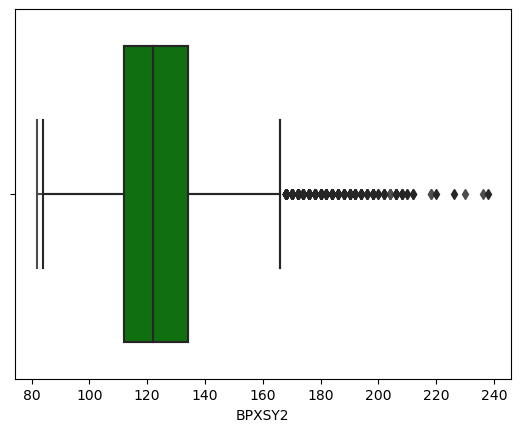

In [83]:
sns.boxplot(x=datos.BPXSY1,color="yellow")

sns.boxplot(x=datos.BPXSY2,color="green")
plt.show()

In [84]:
datos.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [85]:
datos["NIVEL_EDUCATIVO"] = datos.DMDEDUC2.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 

a = (datos.groupby(["NIVEL_EDUCATIVO"]).DMDHHSIZ.value_counts(normalize=True))*100
a.unstack()

DMDHHSIZ,1,2,3,4,5,6,7
NIVEL_EDUCATIVO,,,,,,,
Bachiller,15.261383,27.065767,17.116358,16.188870,10.961214,6.576728,6.829680
Desconocido,NaN,66.666667,NaN,NaN,33.333333,NaN,NaN
No Indica,14.275256,34.773060,19.399707,16.544656,9.516837,2.928258,2.562225
Noveno Grado,10.992366,22.442748,14.656489,13.282443,14.809160,10.839695,12.977099
Noveno a Undecimo Grado,11.664075,22.239502,16.329705,15.241058,14.618974,11.353033,8.553655
Universidad,15.114127,26.896977,19.309068,16.903146,12.214682,5.058606,4.503393


In [86]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'ESTADO_CIVIL', 'SEXO', 'CORTE_EDAD',
       'DIFERENCIA', 'NIVEL_EDUCATIVO'],
      dtype='object')


Restringir la muestra a personas entre 30 y 40 años de edad. Luego calcule el tamaño medio del hogar para mujeres y hombres dentro de cada nivel educativo.

In [87]:
dx = datos.loc[(datos.RIDAGEYR >= 30) & (datos.RIDAGEYR<= 40 ) ,:]
women = datos.groupby(["NIVEL_EDUCATIVO","SEXO"]).DMDHHSIZ.mean()
women

NIVEL_EDUCATIVO          SEXO  
Bachiller                HOMBRE    3.273632
                         MUJER     3.277873
Desconocido              HOMBRE    3.500000
                         MUJER     2.000000
No Indica                HOMBRE    2.850539
                         MUJER     2.969317
Noveno Grado             HOMBRE    3.826797
                         MUJER     3.830946
Noveno a Undecimo Grado  HOMBRE    3.639205
                         MUJER     3.711340
Universidad              HOMBRE    3.108146
                         MUJER     3.225523
Name: DMDHHSIZ, dtype: float64

In [88]:
da = datos.loc[datos.NIVEL_EDUCATIVO.isin(["Bachiller"]),:]
mujer = da.loc[(da.SEXO=="MUJER"),:]

mujer.groupby("NIVEL_EDUCATIVO").DMDHHSIZ.mean()

NIVEL_EDUCATIVO
Bachiller    3.277873
Name: DMDHHSIZ, dtype: float64

Los participantes se pueden agrupar en "unidades de varianza hechas" (MVU) en función de cada combinación de las variables SDMVSTRA y SDMVPSU. Calcule la edad media (RIDAGEYR), la altura (BMXHT) y el IMC (BMXBMI) para cada sexo (RIAGENDR), dentro de cada MVU, e informe la relación entre la media más grande y la más pequeña (por ejemplo, para la altura) en las MVU.

In [89]:
# varianza

varianza = datos["SDMVSTRA"].var()
print(varianza)
varianza = datos["SDMVPSU"].var()
varianza

18.014982625548203


0.2498967142260763

In [90]:
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,ESTADO_CIVIL,SEXO,CORTE_EDAD,DIFERENCIA,NIVEL_EDUCATIVO
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,43.3,43.6,35.9,101.1,2.0,CASADO,HOMBRE,"(60, 70]",4.0,No Indica
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,38.0,40.0,33.2,107.9,NaN,DIVORCIADO,HOMBRE,"(50, 60]",6.0,Bachiller
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,35.6,37.0,31.0,116.5,2.0,CASADO,HOMBRE,"(70, 80]",6.0,Bachiller
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,38.5,37.7,38.3,110.1,2.0,UNION_LIBRE,MUJER,"(50, 60]",-2.0,No Indica
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,37.4,36.0,27.2,80.4,2.0,DIVORCIADO,MUJER,"(40, 50]",-14.0,Universidad


In [91]:
mujer = datos.loc[(datos.RIAGENDR == 2),:]

mujer.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().agg([max,min])

max    55.638462
min    42.541667
Name: RIDAGEYR, dtype: float64

In [92]:
hombre = datos.loc[(datos.RIAGENDR == 1),:]

hombre.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().agg([max,min])

max    55.165289
min    42.063158
Name: RIDAGEYR, dtype: float64

In [93]:
print("hombre \n ",hombre.groupby(["SDMVSTRA","SDMVPSU"]).BMXHT.mean().agg([max,min]))
print("mujer \n ",mujer.groupby(["SDMVSTRA","SDMVPSU"]).BMXHT.mean().agg([max,min]))

hombre 
  max    176.974157
min    169.325000
Name: BMXHT, dtype: float64
mujer 
  max    162.853521
min    155.402041
Name: BMXHT, dtype: float64


In [94]:
datos["IMC"] = (datos.BMXBMI/(datos.BMXHT*datos.BMXHT))
hombre = datos.loc[(datos.RIAGENDR == 1),:]
mujer = datos.loc[(datos.RIAGENDR == 1),:]

print("hombre \n ",hombre.groupby(["SDMVSTRA","SDMVPSU"]).IMC.mean().agg([max,min]))
print("mujer \n ",mujer.groupby(["SDMVSTRA","SDMVPSU"]).IMC.mean().agg([max,min]))


hombre 
  max    0.001115
min    0.000864
Name: IMC, dtype: float64
mujer 
  max    0.001115
min    0.000864
Name: IMC, dtype: float64


In [95]:
mujer.BMXHT

0       184.5
1       171.4
2       170.1
6       165.4
8       166.1
        ...  
5726    156.9
5728    164.9
5729    136.5
5731    182.2
5733    173.3
Name: BMXHT, Length: 2759, dtype: float64

In [96]:
A=datos.BMXBMI.loc[0]
B=datos.BMXHT.loc[0]
print(A,B)

(A/(B*B))

27.8 184.5


0.0008166802535234024

Calcule el rango intercuartílico (IQR) para la edad, la altura y el IMC para cada sexo y cada MVU. Informe la relación entre el IQR más grande y el más pequeño en las MVU.

In [97]:
datos.BMXBMI.quantile(0.75) - datos.BMXBMI.quantile(0.25)

8.7

In [98]:
a = datos.BMXBMI.quantile([0.75-0.25])
a

0.5    28.3
Name: BMXBMI, dtype: float64

In [99]:
33-24.3

8.7

In [100]:
edad = datos.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.mean().quantile(0.75) - datos.RIDAGEYR
edad

0      -11.313567
1       -2.313567
2      -27.313567
3       -5.313567
4        8.686433
          ...    
5730   -25.313567
5731    24.686433
5732   -29.313567
5733    15.686433
5734    26.686433
Name: RIDAGEYR, Length: 5735, dtype: float64

In [101]:
a = datos.RIDAGEYR.quantile(0.25)
b = datos.RIDAGEYR.quantile(0.75)

b - a

31.0

In [102]:
datos["iqr_años"] = datos.RIDAGEYR.quantile(0.75) - datos.RIDAGEYR.quantile(0.25)
print(datos.iqr_años)

import scipy.stats as stats

print(stats.iqr(datos.RIDAGEYR))
datos.head()

0       31.0
1       31.0
2       31.0
3       31.0
4       31.0
        ... 
5730    31.0
5731    31.0
5732    31.0
5733    31.0
5734    31.0
Name: iqr_años, Length: 5735, dtype: float64
31.0


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXARMC,BMXWAIST,HIQ210,ESTADO_CIVIL,SEXO,CORTE_EDAD,DIFERENCIA,NIVEL_EDUCATIVO,IMC,iqr_años
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,35.9,101.1,2.0,CASADO,HOMBRE,"(60, 70]",4.0,No Indica,0.000817,31.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,33.2,107.9,NaN,DIVORCIADO,HOMBRE,"(50, 60]",6.0,Bachiller,0.001048,31.0
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,31.0,116.5,2.0,CASADO,HOMBRE,"(70, 80]",6.0,Bachiller,0.000995,31.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,38.3,110.1,2.0,UNION_LIBRE,MUJER,"(50, 60]",-2.0,No Indica,0.001638,31.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,27.2,80.4,2.0,DIVORCIADO,MUJER,"(40, 50]",-14.0,Universidad,0.000747,31.0


In [103]:
mujer = datos.loc[(datos.RIAGENDR == 2),:]
hombre = datos.loc[(datos.RIAGENDR == 1),:]


años_mujer = mujer.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.agg([stats.iqr])
print(años_mujer)
print("--"*9)
años_hombre = hombre.groupby(["SDMVSTRA","SDMVPSU"]).RIDAGEYR.agg([stats.iqr])
print(años_hombre)

                    iqr
SDMVSTRA SDMVPSU       
119      1        31.25
         2        33.50
120      1        26.50
         2        25.75
121      1        26.25
         2        26.00
122      1        24.00
         2        25.00
123      1        30.50
         2        34.50
124      1        27.00
         2        23.50
125      1        31.00
         2        32.25
126      1        30.25
         2        31.75
127      1        27.25
         2        30.00
128      1        28.00
         2        22.00
129      1        24.75
         2        26.25
130      1        35.50
         2        30.25
131      1        35.75
         2        24.00
132      1        30.00
         2        33.00
133      1        34.00
         2        28.50
------------------
                    iqr
SDMVSTRA SDMVPSU       
119      1        29.75
         2        29.00
120      1        23.75
         2        26.00
121      1        34.50
         2        25.50
122      1        29.

In [104]:
import pandas as pd
from scipy.stats import iqr

df = pd.read_csv("nhanes_2015_2016.csv")

# create a new "grouped" dataset
BMXBMIGrp = df[df.RIDAGEYR.notna()].groupby(['SDMVSTRA', 'SDMVPSU'])

# print a heading
print("\nBMXBMI GROUPED")

# print the "grouped" IQR
print(BMXBMIGrp["RIDAGEYR"].agg(iqr))


BMXBMI GROUPED
SDMVSTRA  SDMVPSU
119       1          31.25
          2          33.00
120       1          26.00
          2          27.00
121       1          31.50
          2          25.00
122       1          27.00
          2          28.75
123       1          30.00
          2          33.00
124       1          30.00
          2          26.00
125       1          29.50
          2          33.75
126       1          33.00
          2          32.50
127       1          29.00
          2          27.75
128       1          30.00
          2          24.00
129       1          22.25
          2          28.75
130       1          35.25
          2          29.00
131       1          36.00
          2          27.00
132       1          25.00
          2          35.00
133       1          33.75
          2          31.00
Name: RIDAGEYR, dtype: float64


En este cuaderno, le pediremos que busque resúmenes numéricos para un determinado conjunto de datos. Utilizará los valores de lo que encuentre en esta tarea para responder preguntas en el cuestionario que sigue (hemos notado dónde se solicitarán valores específicos en el cuestionario, para que pueda registrarlos).

También le pediremos que cree algunas de las tramas que ha visto en lecciones anteriores.

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "nhanes_2015_2016.csv"
datos = pd.read_csv(path)

In [106]:
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0



¿Cuántas filas puedes ver cuando no pones un argumento en el método anterior?
¿Cuántas filas puedes ver si usas un int como argumento?
¿Puedes usar un flotador como argumento?

In [107]:
datos.index == int 
datos.columns == float

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Consideremos solo la característica (o variable) 'BPXSY2

In [108]:
datos.BPXSY2

0       124.0
1       140.0
2       132.0
3       134.0
4       114.0
        ...  
5730    112.0
5731    116.0
5732    146.0
5733    106.0
5734    114.0
Name: BPXSY2, Length: 5735, dtype: float64

Resúmenes numéricos

Encuentre la media (tenga en cuenta esto para el cuestionario que sigue

In [109]:
datos.BPXSY2.mean()

124.78301716350497

In [110]:
datos.BPXSY2.dropna().mean()

124.78301716350497

.dropna()
Para asegurarnos de que no estamos tratando los datos faltantes de una manera que no queremos, sigamos adelante y eliminemos todos los nans de nuestra Serie 

Encuentra el:
Mediana
máx.
mínimo
Desviación Estándar
Diferencia

Puede implementar cualquiera de estos desde python base (es decir, sin ninguno de los paquetes importados), pero hay funciones simples y con nombres intuitivos en la biblioteca numpy para todos estos. También podría usar el hecho de que 'bp' no es solo una lista, sino que es pandas.Series. Puede encontrar los atributos y métodos de pandas.Series

Una gran parte de la programación es poder encontrar las funciones que necesita y comprender el formato de la documentación para que pueda implementar el código usted mismo, por lo que le recomendamos que busque en Internet cuando no esté seguro.

Ejemplo:
Encuentre la diferencia de un elemento en 'pb' en comparación con el elemento anterior en

In [111]:
datos.BPXSY2.dropna().describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [112]:
# ver metodo series

datos_df = datos.BPXSY2.dropna()

prueba_diff = datos_df.diff()
print(prueba_diff)

"""
El método.diff() sirve para hallar diferencias entre datos. Si se usa sin ningún argumento, 
lo que hace es computar 
la diferencia entre el dato de una columna y el mismo dato de la fila inmediatamente anterior.

Lo que hace es hacer la diferencia con el dato de la filia anterior, entonces en la posición 0 
lo que muestra es que es un NAN porque no habia un dato anterior, la posición 1 respecto a la 0 hay una diferencia
de 16 y así sucesivamente se generan las comparaciones, lo que esta haciendo es que esta haciendo una resta.

"""

0        NaN
1       16.0
2       -8.0
3        2.0
4      -20.0
        ... 
5730     0.0
5731     4.0
5732    30.0
5733   -40.0
5734     8.0
Name: BPXSY2, Length: 5535, dtype: float64


'\nEl método.diff() sirve para hallar diferencias entre datos. Si se usa sin ningún argumento, \nlo que hace es computar \nla diferencia entre el dato de una columna y el mismo dato de la fila inmediatamente anterior.\n\nLo que hace es hacer la diferencia con el dato de la filia anterior, entonces en la posición 0 \nlo que muestra es que es un NAN porque no habia un dato anterior, la posición 1 respecto a la 0 hay una diferencia\nde 16 y así sucesivamente se generan las comparaciones, lo que esta haciendo es que esta haciendo una resta.\n\n'

In [113]:
print(prueba_diff.values) 

# esto mostraría solo los valores de la serie y no su indice 

[ nan  16.  -8. ...  30. -40.   8.]


In [114]:
datos_df.median()

122.0

In [115]:
datos_df.agg([min,max])

min     84.0
max    238.0
Name: BPXSY2, dtype: float64

In [116]:
datos_df.std()

18.527011720295047

In [117]:
datos_df.var()

343.25016328395003

In [118]:
stats.iqr(datos_df)

22.0

Hacer un histograma de nuestros datos  usando la biblioteca seaborn que importamos como 'sns'

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Titulo')

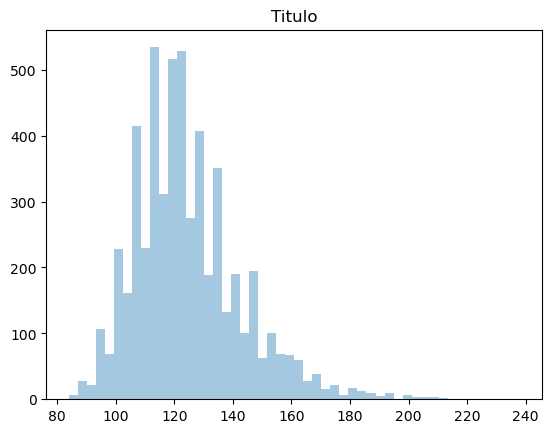

In [119]:
dx = sns.distplot(x=datos_df, kde=False)
dx.set_title("Titulo")

Para crear labels

.set(title='your_title', xlabel='your_x_label', ylabel='your_y_label')
or just

.set(title='your_title')


Haz un diagrama de caja de nuestros datos 'bp' usando la biblioteca seaborn. ¡Asegúrate de que tenga un título y etiquetas!

Text(0.5, 1.0, 'Diagrama de Caja')

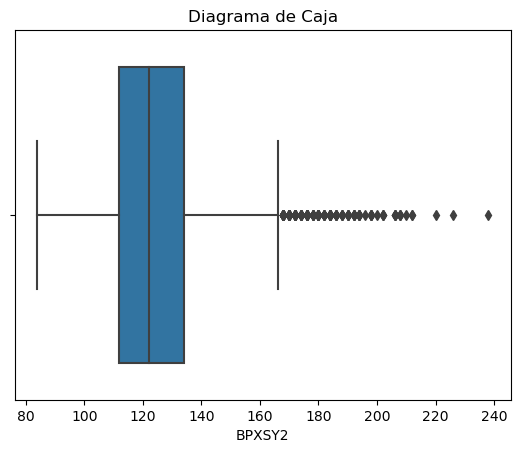

In [120]:
dx = sns.boxplot(data=datos_df, x=datos_df)
dx.set_title("Diagrama de Caja")

# DATOS MULTIVARIADOS CATEGORICOS O CUALITATIVOS


En este caso cuando hablamos de Bivariado hablamos de dos variables, pero cuando hablamós de más variables estamos refiriendonos a datos multivariados.

Los datos categoricos o cualitativos multivariados nos permiten generar una comparación respecto a diferentes variables, podemos observar el numero de registros de una persona con un tipo de nivel de educación, comparandolo con su género y rango de edad, estos elementos con un gráfico de barras o con un gráfico de mosaicos nos permitirán ver los cambios que pueden darse en determinada variable según la composición, podemos ver si hay más participación en un grado academico o nivel escolar por el género y al mismo tiempo si esto varia según el rango de edad.


# DATOS MULTIVARIADOS CUANTITATIVOS

Los datos multivariados cuantitativos nos permiten observar la correlación que existen entre dos variables, si esta es positiva o negativa, si esta es fuerte, moderada o debil, si esta es lineal, cuadratica o no asociación, todo esto nos permite saber si existe una correlación entre los datos, **pero es bueno entender, que una correlación no indica causalidad** podemos ver que hay correlación de que las personas que aumentan la presión arterial y la edad, pero esto no significa **NECESARIAMENTE** que por la edad aumente la presión arterial. 

A este tipo de asociación o correlación, se le llama correlación de **PEARSON**


In [121]:
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [122]:
datos.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


In [123]:
import pandas as pd


datos = pd.read_csv("nhanes_2015_2016.csv")

# para leer todo las columnas agregamos

pd.set_option("display.max_columns",28) 

In [124]:
datos.head()
# ahora no se omite ninguna columna

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [125]:
a = datos.SEQN.values
for i in range(len(a)):
    print(a[i])

83732
83733
83734
83735
83736
83737
83741
83742
83743
83744
83747
83750
83752
83754
83755
83757
83759
83761
83762
83767
83769
83773
83775
83776
83777
83781
83784
83785
83786
83787
83788
83789
83790
83791
83799
83801
83802
83803
83809
83812
83813
83816
83817
83818
83820
83821
83822
83823
83824
83827
83828
83829
83832
83834
83836
83837
83843
83844
83845
83847
83849
83851
83853
83854
83856
83857
83860
83862
83863
83865
83866
83869
83870
83871
83872
83874
83875
83876
83880
83881
83883
83884
83885
83886
83887
83889
83890
83891
83894
83895
83897
83898
83899
83900
83902
83903
83907
83908
83909
83910
83911
83913
83914
83915
83919
83920
83924
83925
83926
83928
83931
83932
83933
83934
83935
83937
83938
83941
83944
83946
83947
83949
83950
83951
83953
83954
83955
83958
83959
83961
83962
83963
83964
83965
83966
83967
83969
83971
83973
83975
83976
83977
83982
83985
83986
83987
83988
83989
83990
83992
83993
83994
83995
83996
83998
83999
84001
84002
84005
84006
84008
84010
84011
84012
84014
84015
8401

# Distribuciones multivariadas en Python
A veces podemos obtener mucha información sobre cómo se relacionan dos variables (o más) si las graficamos juntas. Este tutorial tiene como objetivo mostrar cómo graficar dos variables juntas puede brindarnos información que al graficar cada una por separado puede perderse.

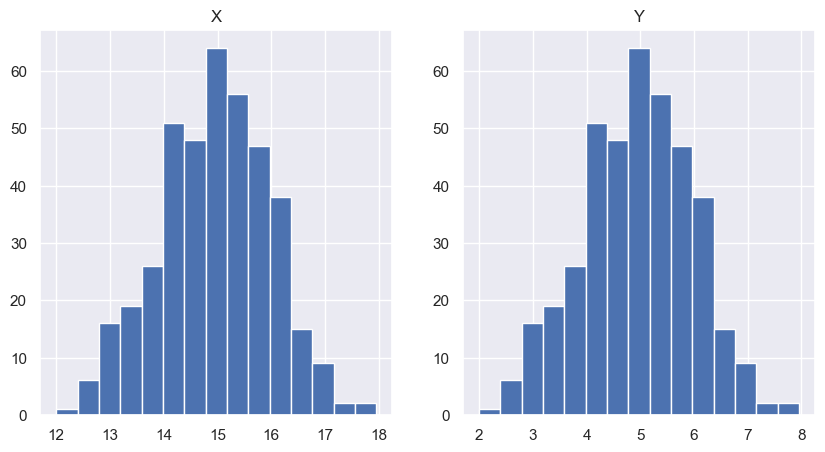

In [126]:
# importar los paquetes que vamos a usar
import numpy as np # para obtener nuestra distribución
import matplotlib.pyplot as plt # para trazar
import seaborn as sns; sns.set() # Para un tema de trazado diferente

# No te preocupes tanto por lo que rho está haciendo aquí
# Solo sepa que si tenemos un rho de 1, obtendremos un resultado perfecto
# línea con pendiente ascendente, y si tenemos un rho de -1, obtendremos
# una línea con pendiente perfectamente descendente. Un rho de 0 será
# consíguenos una 'nube' de puntos
# rho es igual a correlación

r = 1

# No te preocupes tanto por las siguientes tres líneas de código por ahora
# esto es solo obtener los datos para que los tracemos

media = [15, 5]
cov = [[1, r], [r, 1]]
x, y = x, y = np.random.multivariate_normal(media, cov, 400).T

# Ajustar el tamaño de la figura
plt.figure(figsize=(10,5))

# Trace los histogramas de X e Y uno al lado del otro
plt.subplot(1,2,1)
plt.hist(x = x, bins = 15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x = y, bins = 15)
plt.title("Y")

plt.show()

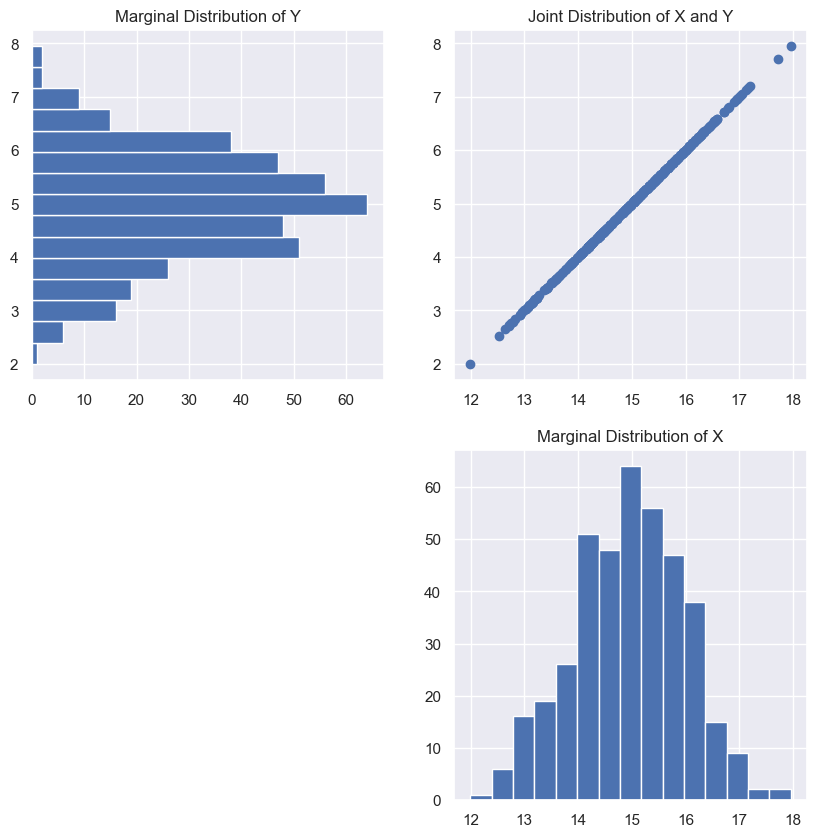

In [127]:
# graficando datos the data
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

# Show the plots
plt.show()

# Cuaderno de prácticas de análisis multivariante con datos del estudio NHANES
Este cuaderno le dará la oportunidad de realizar algunos análisis multivariantes por su cuenta utilizando los datos del estudio NHANES. Estos análisis son similares a los realizados en el cuaderno de la semana 3 del estudio de caso NHANES.

Puede introducir su código en las celdas que dicen "introduzca su código aquí", y puede escribir las respuestas a las preguntas en las celdas que dicen "Escriba Markdown y Latex".

Ten en cuenta que la mayor parte del código que tendrás que escribir a continuación es muy similar al código que aparece en el cuaderno de estudio de caso. Tendrás que editar el código de ese cuaderno en pequeñas partes para adaptarlo a las instrucciones que aparecen a continuación.

Para empezar, utilizaremos las mismas importaciones de módulos y leeremos los datos de la misma manera que lo hicimos en el caso de estudio:

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

# Q1
Realice un diagrama de dispersión que muestre la relación entre la primera y la segunda medición de la presión arterial diastólica (BPXDI1 y BPXDI2). Obtenga también la matriz 4x4 de coeficientes de correlación entre las dos primeras medidas de presión arterial sistólica y las dos primeras medidas de presión arterial diastólica.

Text(0.5, 0, 'BPXDI1')

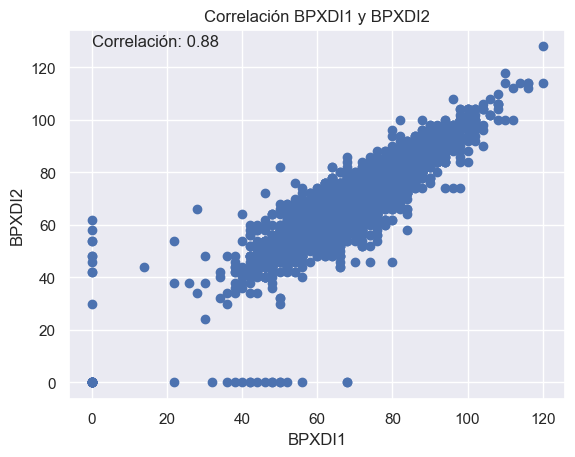

In [129]:
df = datos.loc[:,["BPXDI1","BPXDI2"]].dropna()

corr = pearsonr(df.BPXDI1, df.BPXDI2)

plt.scatter(x=df.BPXDI1, y= df.BPXDI2) 
plt.title("Correlación BPXDI1 y BPXDI2" )
plt.text(x=min(df.BPXDI1), y=max(df.BPXDI2), s=f"Correlación: {corr[0]:.2f}", fontsize=12)
plt.ylabel("BPXDI2")
plt.xlabel("BPXDI1")





In [130]:
print("%0.9f"%corr[1]) # esto quiere decir que existe una correlación real y que esta es moderada

0.000000000


Un ejemplo de correlación real sería si encontráramos que hay una correlación positiva entre las horas de estudio y las calificaciones de los estudiantes. Esto podría indicar que cuanto más tiempo dedican los estudiantes al estudio, mejores son sus calificaciones. En este caso, la correlación es real porque hay una relación causal entre las dos variables: el tiempo dedicado al estudio influye positivamente en las calificaciones.

Por otro lado, un ejemplo de correlación por coincidencia podría ser si encontráramos una correlación positiva entre las calificaciones de los estudiantes y el tamaño de sus zapatos. En este caso, la correlación es por coincidencia porque no hay una relación causal entre las dos variables: el tamaño de los zapatos de los estudiantes y sus calificaciones están correlacionados simplemente por casualidad y no porque una variable influya en la otra. En este caso, una tercera variable, como la edad o el género de los estudiantes, podría estar influyendo en ambas variables, creando la apariencia de una correlación entre ellas.

Text(0, 0.5, 'BPXDI2')

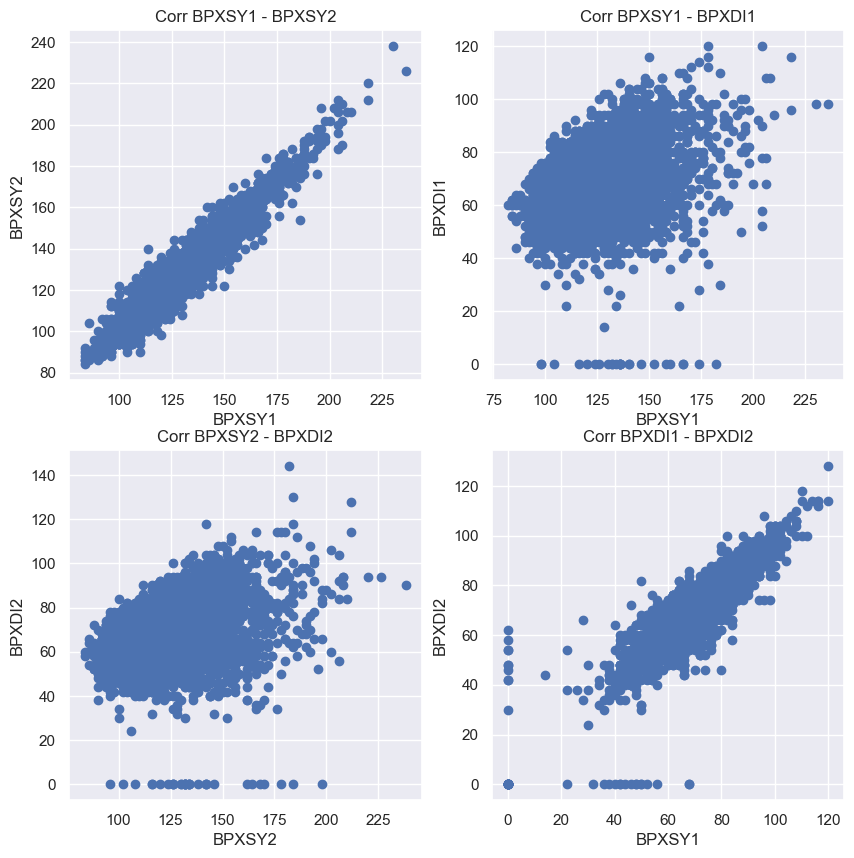

In [131]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x = datos.BPXSY1, y=datos.BPXSY2)
plt.title("Corr BPXSY1 - BPXSY2")
plt.xlabel("BPXSY1")
plt.ylabel("BPXSY2")


plt.subplot(2,2,2)
plt.scatter(x = datos.BPXSY1, y=datos.BPXDI1)
plt.title("Corr BPXSY1 - BPXDI1")
plt.xlabel("BPXSY1")
plt.ylabel("BPXDI1")

plt.subplot(2,2,4)
plt.scatter(x = datos.BPXDI1, y=datos.BPXDI2)
plt.title("Corr BPXDI1 - BPXDI2")
plt.xlabel("BPXSY1")
plt.ylabel("BPXDI2")


plt.subplot(2,2,3)
plt.scatter(x = datos.BPXSY2, y=datos.BPXDI2)
plt.title("Corr BPXSY2 - BPXDI2")
plt.xlabel("BPXSY2")
plt.ylabel("BPXDI2")


P1a. ¿Qué relación existe entre la correlación entre mediciones repetidas de la presión arterial diastólica y la correlación entre mediciones repetidas de la presión arterial sistólica?

Rta: Existe una relación positva entre ambas la primera toma de presión y la segunda toma entre cada tipo de presión arterial, esta relación es posititiva y lineal ligeramente moderada. También se obtuvieron en este tipo de elementos un pvalue entre 0.0, lo qe demostra que la relación es real entre las variables, descartando la hipotesis nula. 

P2a. ¿Están la segunda medición de la presión arterial sistólica y la segunda medición de la presión arterial diastólica más correlacionadas o menos correlacionadas que la primera medición de la presión arterial sistólica y la primera medición de la presión arterial diastólica?

In [132]:
corr, pvalue = pearsonr(datos.BPXSY1.notnull(), datos.BPXDI1.notnull())

print(corr,pvalue)

0.9999999999999987 0.0


0.3165311034587997 5.783981008886146e-126


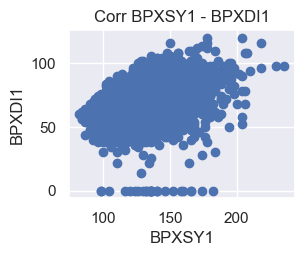

In [133]:


plt.subplot(2,2,2)
plt.scatter(x = datos.BPXSY1, y=datos.BPXDI1)
plt.title("Corr BPXSY1 - BPXDI1")
plt.xlabel("BPXSY1")
plt.ylabel("BPXDI1")

corr, pvalue = pearsonr(datos.BPXSY1.dropna(), datos.BPXDI1.dropna())

print(corr,pvalue)


Hay una baja correlación entre las dos variables indicadas. 

Pregunta 2
Construya una cuadrícula de gráficos de dispersión entre la primera medición de la presión arterial sistólica y la primera medición de la presión arterial diastólica. Estratifique los gráficos por sexo (filas) y por grupos de raza/etnia (columnas).

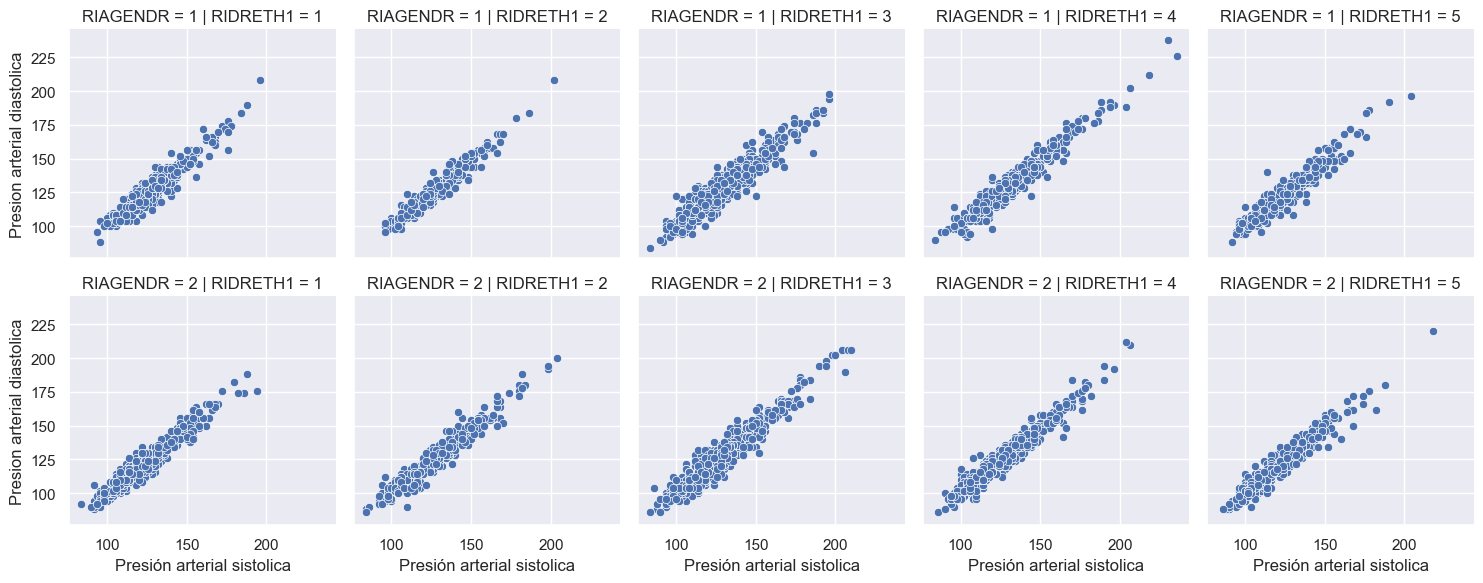

In [134]:
rejilla = sns.FacetGrid(data=datos, row="RIAGENDR",col="RIDRETH1")

# mapear el gráfico de dispersión por cuadrantes

rejilla.map(sns.scatterplot,"BPXSY1","BPXSY2")

# aJUSTAR LOS TITULOS Y LAS COLUMNAS SEGÚN LOS VALORES EN LOS DATOS

rejilla.set_axis_labels("Presión arterial sistolica","Presion arterial diastolica")

En este cuaderno, ilustramos varias técnicas básicas para explorar datos utilizando métodos para comprender las relaciones multivariadas. Los métodos estadísticos discutidos aquí serán paralelos a los métodos discutidos en la sección de métodos multivariados del curso, y se basarán en el análisis univariado discutido anteriormente. Al igual que con el cuaderno univariado, aquí usamos la ola 2015-2016 del estudio NHANES para ilustración.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
datos = pd.read_csv("nhanes_2015_2016.csv")
datos.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

<AxesSubplot:xlabel='BMXLEG', ylabel='BMXARML'>

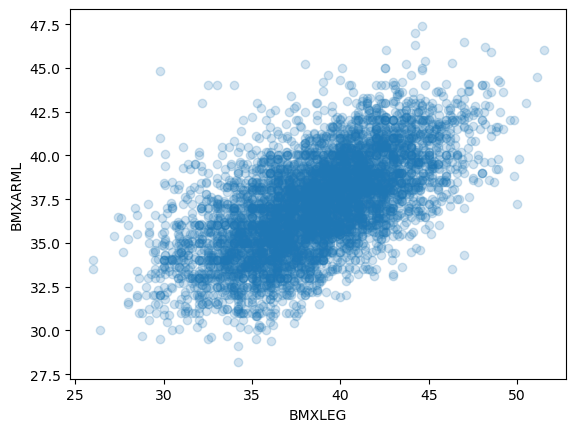

In [3]:
sns.regplot(data=datos, x="BMXLEG", y="BMXARML", fit_reg=False, scatter_kws={"alpha":0.2})

En particular, scatter_kws={"alpha": 0.2} establece la opacidad (transparencia) de los puntos en el gráfico de dispersión en 0.2, lo que significa que los puntos serán ligeramente transparentes y permitirán ver mejor si hay superposición entre ellos.

Otra forma de evitar la sobregraficación es hacer una gráfica de la "densidad" de los puntos. En las gráficas a continuación, los colores más oscuros indican dónde cae una mayor cantidad de puntos. Los dos márgenes del gráfico muestran las densidades de las longitudes de los brazos y las piernas por separado, mientras que el gráfico del centro muestra su densidad de forma conjunta.

Este gráfico también muestra el coeficiente de correlación de Pearson entre la longitud del brazo y la longitud de la pierna, que es 0,62. Como se discutió en el curso, el coeficiente de correlación de Pearson varía de -1 a 1, con valores cercanos a 1 que indican una dependencia positiva más perfecta. En muchos entornos, una correlación de 0,62 se consideraría una dependencia positiva moderadamente fuerte.

In [4]:
datos.BMXLEG.corr(datos.BMXARML)

0.62453700127425

Text(0.7, 0.95, '0.8635016986749067')

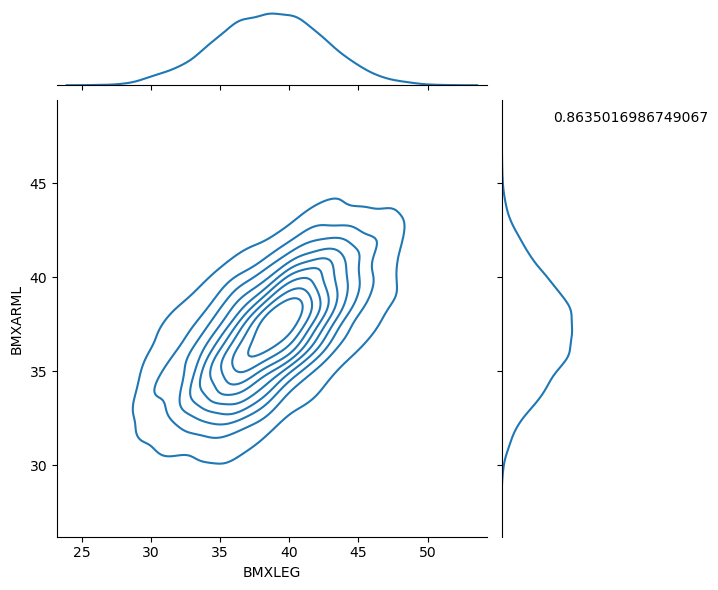

In [5]:
sns.jointplot(data=datos, x="BMXLEG", y="BMXARML",kind="kde")

correlacion, pvalor = stats.pearsonr(datos.BMXLEG.notnull(),datos.BMXARML.notnull())
plt.annotate(correlacion, xy=(0.7, 0.95), xycoords='axes fraction')


A continuación, observamos dos medidas repetidas de la presión arterial sistólica, tomadas con unos minutos de diferencia en la misma persona. Estos valores están muy altamente correlacionados, con un coeficiente de correlación de alrededor de 0,96.

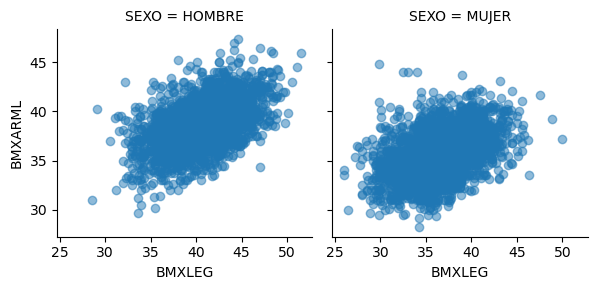

In [11]:
datos["SEXO"] = datos.RIAGENDR.replace({1:"HOMBRE",2:"MUJER"})

sns.FacetGrid(datos, col="SEXO").map(plt.scatter,"BMXLEG","BMXARML", alpha=0.5).add_legend()

De acuerdo con el diagrama de dispersión, se puede ver una correlación ligeramente más débil entre la longitud del brazo y la longitud de la pierna en las mujeres (en comparación con los hombres) al calcular el coeficiente de correlación por separado dentro de cada género.

El método 'corr' de un marco de datos calcula los coeficientes de correlación para cada par de variables en el marco de datos. Este método devuelve una "matriz de correlación", que es una tabla que contiene las correlaciones entre cada par de variables en el conjunto de datos. Tenga en cuenta que la diagonal de una matriz de correlación siempre contiene 1, ya que una variable siempre tiene correlación 1 consigo misma. La matriz de correlación también es simétrica alrededor de esta diagonal, ya que la correlación entre dos variables 'X' e 'Y' no depende del orden en que consideremos las dos variables.

En los resultados a continuación, vemos que la correlación entre la longitud de la pierna y la longitud del brazo en los hombres es de 0,50, mientras que en las mujeres la correlación es de 0,4

In [27]:
print("MUJERES","---"*10)
print(datos.loc[datos.SEXO=="MUJER", ["BMXLEG","BMXARML"]].dropna().corr())
print("HOMBRES","---"*10)
print(datos.loc[datos.SEXO=="HOMBRE", ["BMXLEG","BMXARML"]].dropna().corr())

MUJERES ------------------------------
           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000
HOMBRES ------------------------------
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


A continuación, buscamos estratificar los datos por género y etnia. Esto da como resultado 2 x 5 = 10 estratos totales, ya que hay 2 estratos de género y 5 estratos de etnia. Estos diagramas de dispersión revelan diferencias en las medias, así como diferencias en el grado de asociación (correlación) entre diferentes pares de variables. Vemos que aunque algunos grupos étnicos tienden a tener brazos y piernas más largos o más cortos que otros, la relación entre la longitud del brazo y la longitud de la pierna dentro de los géneros es más o menos similar en todos los grupos étnicos.

Una observación notable es que el grupo étnico 5, que consiste en personas que informan ser multirraciales o de cualquier raza no tratada como un grupo separado (debido al pequeño tamaño de la muestra), la correlación entre la longitud del brazo y la longitud de la pierna es más fuerte, especialmente para los hombres. Esto no es sorprendente, ya que una mayor heterogeneidad puede permitir que surjan correlaciones que son imperceptibles en datos más homogéneos.

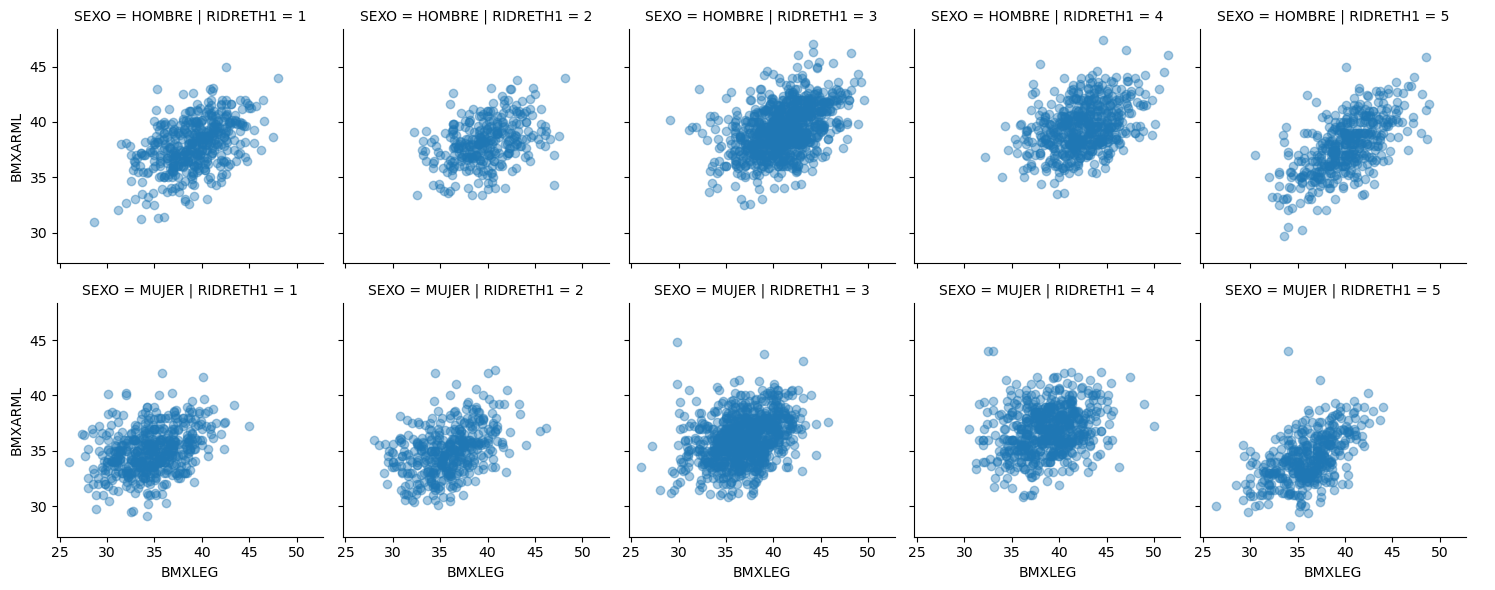

In [28]:
_ = sns.FacetGrid(datos, col="RIDRETH1", row="SEXO").map(plt.scatter, "BMXLEG","BMXARML",alpha=0.4).add_legend()

# Datos bivariados categóricos
En esta sección analizamos algunos métodos para trabajar con datos bivariados que son categóricos. Podemos comenzar con una tabla de contingencia, que cuenta el número de personas que tienen cada combinación de dos factores. Para ilustrar, consideraremos las variables NHANES para el estado civil y el nivel educativo.

Primero, creamos nuevas versiones de estas dos variables utilizando etiquetas de texto en lugar de números para representar las categorías. También creamos un nuevo conjunto de datos que omite a las personas que respondieron "No sé" o que se negaron a responder estas preguntas.

In [32]:
datos["EDUCACION"] = datos.DMDEDUC2.replace({1:"Noveno",
                                     2: "Noveno - Undecimo",
                                     3: "Bachiller",
                                     4: "Cursando U",
                                     5: "Pregrado",
                                     7: "No Contesta",
                                     9: "No Sabe"})
datos["ESTADO_CIVIL"] = datos.DMDMARTL.replace({
    1:"Casado/a", 2:"Viudo/a",3:"Divorciado",4:"Separado",
    5:"Nunca Casado", 6:"Union Libre", 77:"No Contesta" 
})

a = datos.loc[(datos.EDUCACION != "No Sabe") & (datos.ESTADO_CIVIL != "No Contesta")]

Ahora podemos crear una tabla de contingencia, contando el número de personas en cada celda definida por una combinación de educación y estado civil.


In [33]:
x = pd.crosstab(a.EDUCACION, a.ESTADO_CIVIL)
x

ESTADO_CIVIL,Casado/a,Divorciado,Nunca Casado,Separado,Union Libre,Viudo/a
EDUCACION,,,,,,
Bachiller,550,127,237,40,133,99
Cursando U,757,217,332,42,163,108
Noveno,341,52,65,43,66,88
Noveno - Undecimo,305,62,117,39,80,40
Pregrado,827,120,253,22,85,59


> El método crosstab() devuelve una tabla de Pandas con las frecuencias y estadísticas resumidas de las variables categóricas proporcionadas. La tabla puede ser utilizada para visualizar la relación entre las variables y para realizar pruebas estadísticas sobre ellas.

Los resultados serán más fáciles de interpretar si normalizamos los datos. Una tabla de contingencia se puede normalizar de tres maneras: podemos hacer que las filas sumen 1, las columnas sumen 1 o toda la tabla sume 1. A continuación, normalizamos dentro de las filas. Esto nos da la proporción de personas en cada categoría de nivel educativo que se encuentran en cada grupo de la variable de estado civil.

El estado civil modal (más común) para las personas dentro de cada grupo de nivel educativo es "casado". Sin embargo, cuantitativamente, la proporción de personas casadas varía sustancialmente, y es notablemente más alta para los graduados universitarios (alrededor del 61%) en comparación con los grupos con un nivel educativo más bajo.



In [36]:
x.apply(lambda x: (x/x.sum())*100, axis=1)

ESTADO_CIVIL,Casado/a,Divorciado,Nunca Casado,Separado,Union Libre,Viudo/a
EDUCACION,,,,,,
Bachiller,46.374368,10.708263,19.983137,3.372681,11.214165,8.347386
Cursando U,46.757258,13.403335,20.506485,2.594194,10.067943,6.670784
Noveno,52.061069,7.938931,9.923664,6.564885,10.076336,13.435115
Noveno - Undecimo,47.433904,9.642302,18.195956,6.065319,12.441680,6.220840
Pregrado,60.541728,8.784773,18.521230,1.610542,6.222548,4.319180


También podemos normalizar dentro de las columnas en lugar de normalizar dentro de las filas. Esto nos da la proporción de personas con cada grupo de estado civil que tienen cada nivel educativo.

In [37]:
x.apply(lambda x: (x/x.sum())*100, axis=0)

ESTADO_CIVIL,Casado/a,Divorciado,Nunca Casado,Separado,Union Libre,Viudo/a
EDUCACION,,,,,,
Bachiller,19.784173,21.972318,23.605578,21.505376,25.237192,25.126904
Cursando U,27.230216,37.543253,33.067729,22.580645,30.929791,27.411168
Noveno,12.266187,8.996540,6.474104,23.118280,12.523719,22.335025
Noveno - Undecimo,10.971223,10.726644,11.653386,20.967742,15.180266,10.152284
Pregrado,29.748201,20.761246,25.199203,11.827957,16.129032,14.974619


In [39]:
a.groupby(["SEXO", "EDUCACION", "ESTADO_CIVIL"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

ESTADO_CIVIL              Casado/a  Divorciado  Nunca Casado  Separado  \
SEXO   EDUCACION                                                         
HOMBRE Bachiller          0.512438    0.092869      0.210614  0.026534   
       Cursando U         0.530239    0.115331      0.198312  0.018284   
       Noveno             0.630719    0.065359      0.088235  0.039216   
       Noveno - Undecimo  0.525568    0.082386      0.190341  0.048295   
       Pregrado           0.636364    0.063174      0.187982  0.015408   
MUJER  Bachiller          0.413379    0.121784      0.188679  0.041166   
       Cursando U         0.418502    0.148678      0.210352  0.031938   
       Noveno             0.424069    0.091691      0.108883  0.088825   
       Noveno - Undecimo  0.412371    0.113402      0.171821  0.075601   
       Pregrado           0.577406    0.110181      0.182706  0.016736   

ESTADO_CIVIL              Union Libre   Viudo/a  
SEXO   EDUCACION                                 
HOMBRE Bachiller             0.114428  0.043118  
       Cursando U            0.102672  0.035162  
       Noveno                0.111111  0.065359  
       Noveno - Undecimo     0.125000  0.028409  
       Pregrado              0.069337  0.027735  
MUJER  Bachiller             0.109777  0.125214  
       Cursando U            0.099119  0.091410  
       Noveno                0.091691  0.194842  
       Noveno - Undecimo     0.123711  0.103093  
       Pregrado              0.055788  0.057183

Un factor detrás del mayor número de mujeres divorciadas y viudas podría ser que las mujeres viven más que los hombres. Para minimizar el impacto de este factor, podemos volver a calcular la tabla anterior utilizando unas pocas bandas estrechas de edades. Para simplificar aquí, colapsamos los datos de estado civil para caracterizar a las personas como "casadas" o "solteras". Esto nos permite centrarnos en la tasa de matrimonio, que es una variable ampliamente estudiada en la investigación de las ciencias sociales.

Hay una serie de resultados intrigantes aquí. Por ejemplo, la tasa de matrimonio parece disminuir a medida que las personas con educación universitaria envejecen (por ejemplo, el 71 % de las mujeres con educación universitaria entre 49 y 50 años están casadas, pero solo el 65 % de las mujeres con educación universitaria entre 50 y 59 años están casadas, una caída aún mayor ocurre para los hombres). Sin embargo, en las personas con un nivel de educación HS/GED, la tasa de matrimonio es más alta para las personas mayores (aunque es más baja en comparación con la muestra con educación universitaria). Hay varias explicaciones posibles para esto, por ejemplo, que volver a casarse después del divorcio es menos común entre los graduados universitarios.

In [42]:
dx = a.loc[(a.RIDAGEYR>=40) & (a.RIDAGEYR< 50)]

A = dx.groupby(["SEXO","EDUCACION","ESTADO_CIVIL"]).size().unstack().fillna(0).apply(lambda x:x/x.sum(), axis=1)

dx = a.loc[(a.RIDAGEYR>=50) & (a.RIDAGEYR< 60)]

B = dx.groupby(["SEXO","EDUCACION","ESTADO_CIVIL"]).size().unstack().fillna(0).apply(lambda x:x/x.sum(), axis=1)

print(A)
print("--"*10)
print(B)

ESTADO_CIVIL              Casado/a  Divorciado  Nunca Casado  Separado  \
SEXO   EDUCACION                                                         
HOMBRE Bachiller          0.616279    0.093023      0.162791  0.046512   
       Cursando U         0.625000    0.125000      0.096154  0.019231   
       Noveno             0.714286    0.023810      0.095238  0.000000   
       Noveno - Undecimo  0.574074    0.092593      0.166667  0.037037   
       Pregrado           0.879310    0.051724      0.034483  0.000000   
MUJER  Bachiller          0.476744    0.151163      0.116279  0.104651   
       Cursando U         0.509554    0.184713      0.152866  0.057325   
       Noveno             0.464286    0.089286      0.142857  0.125000   
       Noveno - Undecimo  0.581818    0.090909      0.163636  0.090909   
       Pregrado           0.713376    0.121019      0.108280  0.012739   

ESTADO_CIVIL              Union Libre   Viudo/a  
SEXO   EDUCACION                                 
HOMBRE Bach

# Concluimos 

Esta sección señalando que el estado civil está asociado con muchos factores, incluidos el género y el nivel educativo, pero también varía mucho según la edad y la cohorte de nacimiento. Por ejemplo, es poco probable que los jóvenes enviudan, y es menos probable que las personas mayores "nunca se hayan casado", ya que una persona puede pasar de "nunca se ha casado" a una de las otras categorías, pero nunca puede volver atrás. . A continuación, consideraremos el papel de la edad con más detalle, y más adelante en el curso revisaremos estas preguntas utilizando métodos analíticos más sofisticados que pueden dar cuenta de todos estos factores simultáneamente. Sin embargo, dado que NHANES es un estudio transversal, hay ciertas preguntas importantes que no se pueden usar para responder. Por ejemplo, si bien conocemos el estado civil actual de cada persona, no conocemos su historial matrimonial completo (por ejemplo, cuántas veces y a qué edad se casaron o divorciaron).

Datos mixtos categóricos y cuantitativos
Otra situación que comúnmente surge en el análisis de datos es cuando deseamos analizar datos bivariados que consisten en una variable cuantitativa y otra categórica. Para ilustrar los métodos que se pueden usar en este entorno, consideramos la relación entre el estado civil y la edad en los datos de NHANES. Específicamente, consideramos la distribución de edades de las personas que se encuentran actualmente en cada categoría de estado civil. Una herramienta natural en este entorno son los diagramas de caja uno al lado del otro. Aquí vemos algunas cosas que no sorprenden: las personas viudas tienden a ser mayores y las personas que nunca se han casado tienden a ser más jóvenes.

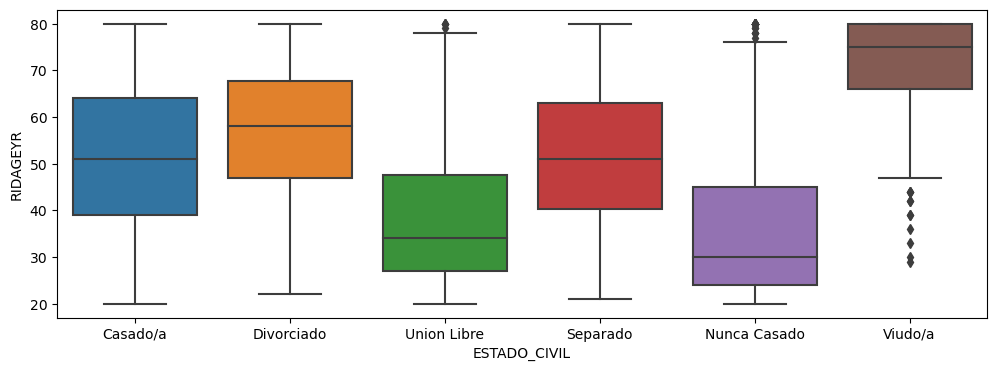

In [47]:
plt.figure(figsize=(12,4))
AX = sns.boxplot(x=a.ESTADO_CIVIL, y= a.RIDAGEYR)

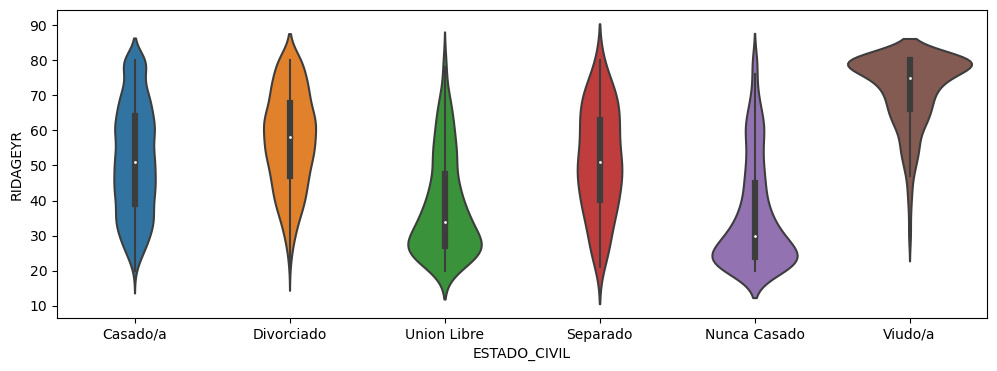

In [48]:
plt.figure(figsize=(12,4))
AX = sns.violinplot(x=a.ESTADO_CIVIL, y= a.RIDAGEYR)

Muestreo de una población sesgada
En este tutorial, repasaremos un código que recrea las visualizaciones en la demostración de distribución de muestreo interactivo. Esta demostración analiza un problema hipotético que ilustra lo que sucede cuando tomamos muestras de una población sesgada y no de toda la población que nos interesa. Este tutorial asume que ha visto esa demostración, por contexto, y comprende las estadísticas detrás de los gráficos.

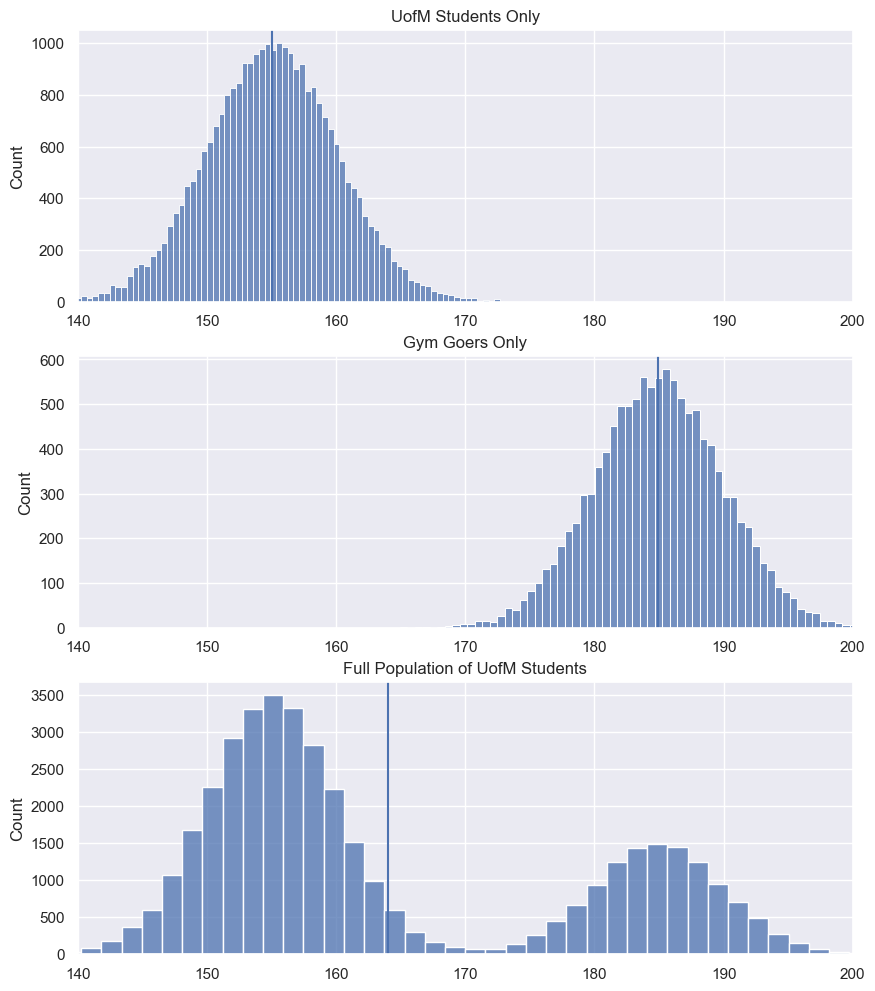

In [5]:
# Import the packages that we will be using for the tutorial
# Importamos los paquetes que se utilizarán en el tutorial
import numpy as np # for sampling for the distributions
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns; sns.set() # for plotting of the histograms

# Recreate the simulations from the video 
# Establecemos los parámetros para la simulación
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
totalPopSize = 40000

# Create the two subgroups
# Creamos los dos subgrupos de la población utilizando numpy.random.normal()
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))

# Create the population from the subgroups
# Combinamos las dos muestras de subgrupos para crear la población
population = np.append(uofm_students, students_at_gym)

# Set up the figure for plotting
# Establecemos el tamaño de la figura para los gráficos
plt.figure(figsize=(10,12))

# Plot the UofM students only
# Trazamos el histograma de la distribución de los estudiantes de UofM
plt.subplot(3,1,1)
sns.histplot(uofm_students)
plt.title("UofM Students Only")
plt.axvline(x = np.mean(uofm_students))
plt.xlim([140,200])

# Plot the Gym Goers only
# Trazamos el histograma de la distribución de los estudiantes del gimnasio
plt.subplot(3,1,2)
sns.histplot(students_at_gym)
plt.title("Gym Goers Only")
plt.axvline(x = np.mean(students_at_gym))
plt.xlim([140,200])

# Plot both groups together
# Trazamos el histograma de la distribución de la población completa
plt.subplot(3,1,3)
sns.histplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

plt.show()


# ¿Qué sucede si tomamos muestras de toda la población?
Tomaremos muestras al azar de todos los estudiantes de la Universidad de Michigan.

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


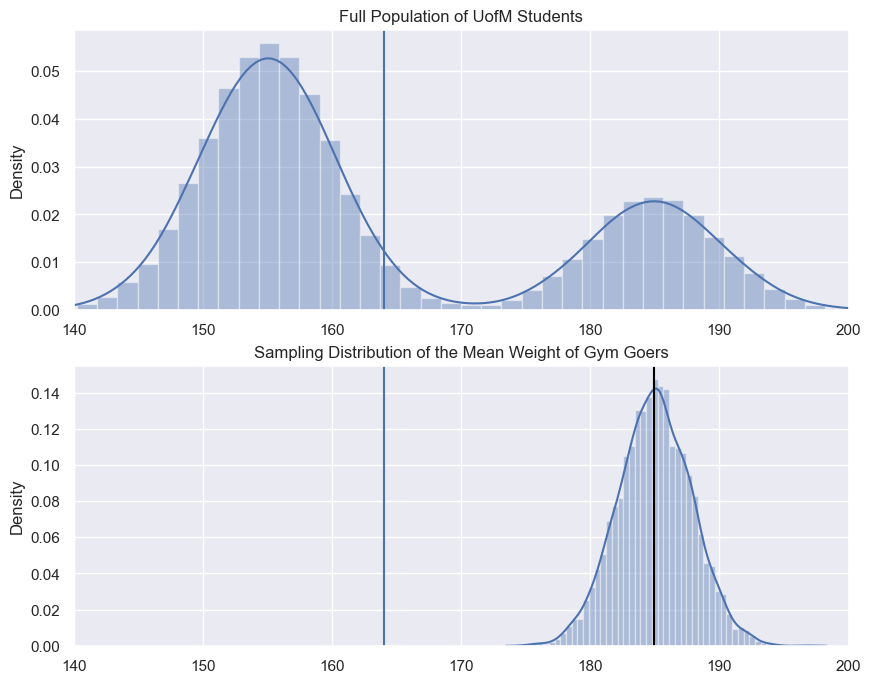

In [7]:
# Simulation parameters
numberSamps = 5000
sampSize = 3

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students) 
    

# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.distplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(students_at_gym), color = "black")
plt.xlim([140,200])

plt.show()


# Aleatoriedad y reproducibilidad
Como aprendimos a principios de esta semana, el concepto de aleatoriedad es la piedra angular de la inferencia estadística cuando se extraen muestras de poblaciones más grandes.

En este tutorial, vamos a cubrir lo siguiente:

Aleatoriedad y sus usos en python.

Utilizando semillas de python para reproducir el análisis.

Generación de variables aleatorias a partir de una distribución de probabilidad.

Muestreo aleatorio de una población.

¿Qué es la aleatoriedad?
Al comienzo de las conferencias de esta semana, abordamos la importancia de la aleatoriedad cuando se trata de realizar inferencias estadísticas en muestras de población. Si tenemos una aleatoriedad completa, nuestras estimaciones de medias, proporciones y totales están distorsionadas. Esto significa que nuestras estimaciones son iguales a los valores de la población en promedio.

En Python, nos referimos a la aleatoriedad como la capacidad de generar datos, cadenas o, de manera más general, números al azar.

Sin embargo, al realizar el análisis es importante tener en cuenta la reproducibilidad. Si estamos creando datos aleatorios, ¿cómo podemos permitir un análisis reproducible?

Hacemos esto utilizando generadores de números pseudoaleatorios (PRNG). Los PRNG comienzan con un número aleatorio, conocido como semilla, y luego usan un algoritmo para generar una secuencia pseudoaleatoria basada en él.

Esto significa que podemos replicar la salida de un generador de números aleatorios en python simplemente sabiendo qué semilla se utilizó.

Podemos mostrar esto usando las funciones aleatorias en la biblioteca de python.

Establecer una semilla y generar números aleatorios¶

In [8]:
import random

In [9]:
random.seed(1234)

random.random()

0.9664535356921388

In [10]:
random.seed(1234)

random.random()

0.9664535356921388

In [11]:
# Random numero para una distribución real

# Uniforme

random.uniform(25,50)

36.01831497938382

In [12]:
uniform_numeros = [random.uniform(0,1) for _ in range(1000)]
uniform_numeros

[0.007491470058587191,
 0.9109759624491242,
 0.939268997363764,
 0.5822275730589491,
 0.6715634814879851,
 0.08393822683708396,
 0.7664809327917963,
 0.23680977536311776,
 0.030814021726609964,
 0.7887727172362835,
 0.3460889655971231,
 0.6232814750391685,
 0.6158156951036152,
 0.14855463870828756,
 0.18309064740993164,
 0.11441296968868764,
 0.014618780486909122,
 0.48675154060475834,
 0.9649015609162157,
 0.06456228097718608,
 0.5410881855511303,
 0.46589855900830957,
 0.6014634495610515,
 0.08892882999066232,
 0.5790026861873665,
 0.26958550381944824,
 0.5564325605562156,
 0.6446342341782827,
 0.48103637136651844,
 0.35523914744298335,
 0.249152121361209,
 0.9335154980423467,
 0.45338801947649354,
 0.5301612069115903,
 0.019299566309716853,
 0.5081019257797922,
 0.005780237417743139,
 0.14376842759559538,
 0.47282692534740633,
 0.3773474407725964,
 0.05417519864614284,
 0.5875285081310694,
 0.1640032237419612,
 0.5573302374414681,
 0.1442457216019083,
 0.9373070846962247,
 0.7709799

In [13]:
# Distribución Normal

media = 0
std = 1
random.normalvariate(media, std)

-0.5120344186633362

In [14]:
media = 5
std = 2
random.normalvariate(media, std)

4.772935466104815

In [15]:
media = 0
std = 1
[random.normalvariate(media,std) for _ in range(10000)]

[0.9836782518477859,
 -0.1279101687591586,
 -0.3624403898225458,
 0.7827052278831221,
 -0.7070779863207516,
 -0.6448080239634407,
 1.4456726257278167,
 0.06320794089168544,
 -0.29753597708213325,
 -0.32560560777628234,
 -0.7230778730855582,
 -0.13076016750403674,
 -0.30061745241957266,
 -1.0659338448280822,
 0.18702539900575452,
 -0.5687484200779066,
 0.3649845859647074,
 1.7494040278146015,
 0.22600474005569396,
 -1.1151380585639925,
 -0.19273145821820742,
 -0.1894484224252513,
 -1.2991944916491394,
 0.0014470309434913397,
 -2.016619191103081,
 -0.4868974368345301,
 0.38623594444235065,
 -1.0279664100736308,
 2.0696667563512854,
 -0.21915509444362868,
 0.05837508542557953,
 -1.0421644744582546,
 0.520337034045725,
 1.6298123466140946,
 0.2731902531856528,
 -0.49626275975376827,
 0.7213906936670386,
 0.4689259813211926,
 0.15933457854920816,
 -1.7959849130370746,
 1.3045111181234956,
 0.7813604382974706,
 -0.4904504866798668,
 0.052711516960373433,
 0.37613597276846417,
 1.188808962284

Muestreo aleatorio de una población
De la lectura, sabemos que el muestreo aleatorio simple (SRS) tiene las siguientes propiedades:

Comience con una lista conocida de N* unidades de población y seleccione al azar *n unidades de la lista
Cada unidad tiene la misma probabilidad de selección = n/N
Todas las muestras posibles de tamaño n son igualmente probables
Las estimaciones de medias, proporciones y totales basadas en SRS son IMPARCIALES (lo que significa que son iguales a los valores de la población en promedio)

In [16]:
import random
import numpy as np

In [17]:
media = 0
std = 1
poblacion = [random.normalvariate(media,std) for _ in range(10000)]

In [18]:
muestra_A = random.sample(poblacion, 500)
muestra_B = random.sample(poblacion, 500)

In [19]:
print(np.mean(muestra_A))
print(np.mean(muestra_B))

-0.03679151780067788
-0.056179854381564705


In [20]:
print(np.std(muestra_A))
print(np.std(muestra_B))

0.9766382398022297
1.0177887394895448


In [23]:
medias = [np.mean(random.sample(poblacion,1000)) for _ in range(100)]

np.mean(medias)

0.0019374303097350368

# REGLA EMPIRICA
La regla empírica o la regla 68 - 95 - 99.7, que describe cuántas observaciones se encuentran dentro de una cierta distancia de nuestra media. Esta distancia desde la media se denota como sigma, o desviación estándar (la distancia promedio a la que se encuentra una observación de la media).

La siguiente imagen puede ayudar a refrescar su memoria:

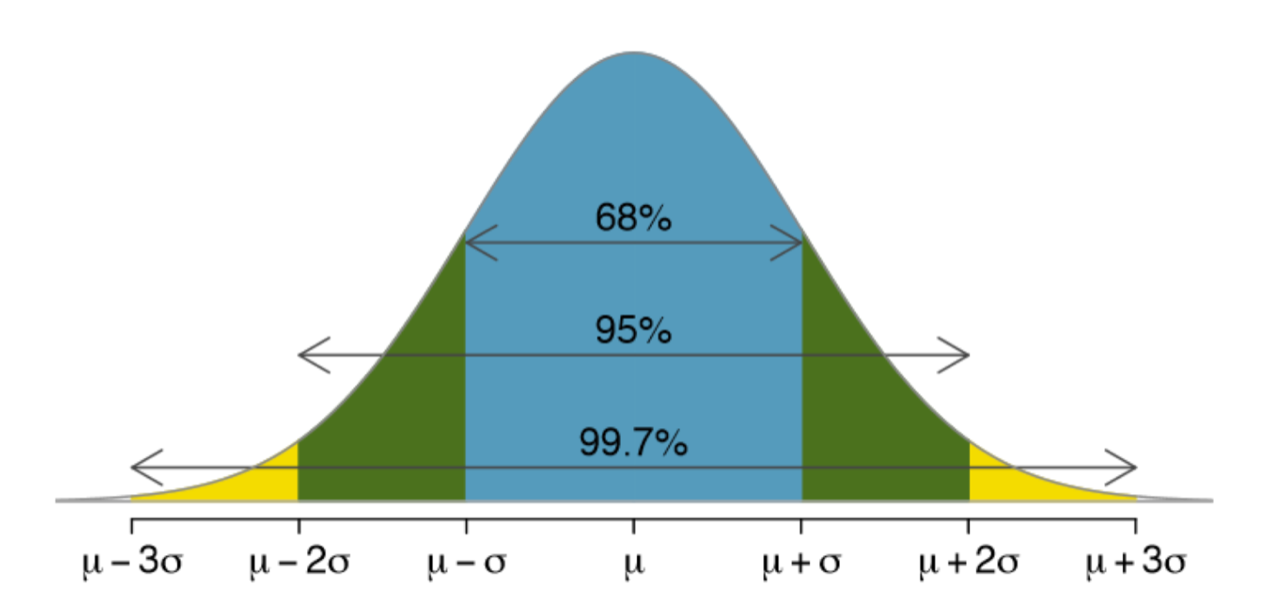

Para este tutorial, exploraremos la cantidad de horas que recibe el estudiante universitario promedio.

El ejemplo utilizado en la conferencia indicó que había una media de 7 y una desviación estándar de 1,7 para las horas de sueño; Usaremos estos mismos valores.

In [24]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [25]:
media = 7 # 7 horas

std = 1.7 # horas

df = [random.normalvariate(media,std) for i in range(100000)] 


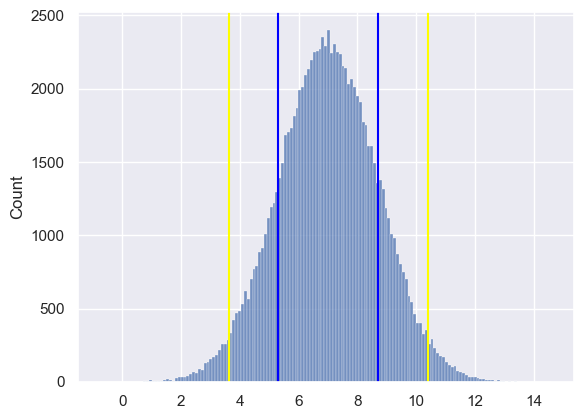

In [27]:
sns.histplot(df)

plt.axvline(np.mean(df) + np.std(df),color="blue")
plt.axvline(np.mean(df) - np.std(df),color="blue")

plt.axvline(np.mean(df) + (np.std(df)*2),color="yellow")
plt.axvline(np.mean(df) - (np.std(df)*2),color="yellow")

In [28]:
SampleA = random.sample(df, 100)
SampleB = random.sample(df, 100)
SampleC = random.sample(df, 100)

<AxesSubplot:ylabel='Density'>

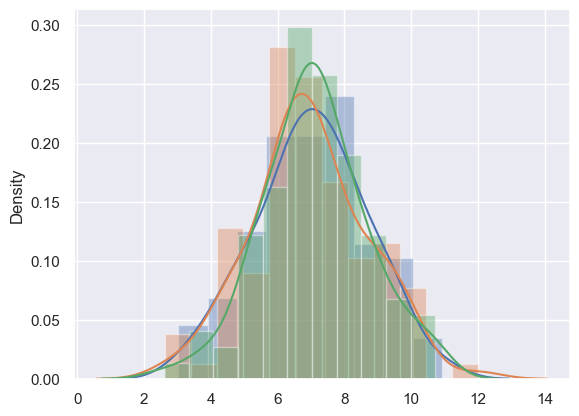

In [29]:
fig, ax = plt.subplots()

sns.distplot(SampleA, ax = ax)
sns.distplot(SampleB, ax = ax)
sns.distplot(SampleC, ax = ax)

In [34]:
import pandas as pd

# como df es una lista, debo usar pandas y volverlo una serie porque solo es una columna de datos
pd.Series(df).describe()

count    100000.000000
mean          7.000626
std           1.693249
min          -0.754203
25%           5.865611
50%           7.003080
75%           8.144851
max          14.595650
dtype: float64

Podríamos decir que las tres muestras estan cerca a la media poblacional y que cumplen la regla empirica. 